In [1]:
from scipy.io import netcdf as nc
import numpy as np
import math
from mpl_toolkits.basemap import Basemap
from pylab import *
from matplotlib import *
import pandas as pd
import copy

In [2]:
def readnc_1d(ncfile,varname):
        fid = nc.netcdf_file(ncfile, 'r')
        out = np.array(fid.variables[varname][:]).squeeze()
        fid.close()
        return out

In [3]:
def readnc_2d(ncfile,varname):
        fid = nc.netcdf_file(ncfile, 'r')
        out = np.array(fid.variables[varname][:,:]).squeeze()
        fid.close()
        return out

In [4]:
def gen_pal_Testu():
    pal = ( ( 1.0000, 1.0000, 1.0000 ),
    ( 0.9923, 0.9753, 0.9985 ),
    ( 0.9692, 0.9005, 0.9941 ),
    ( 0.9460, 0.8258, 0.9897 ),
    ( 0.9228, 0.7510, 0.9853 ),
    ( 0.8996, 0.6763, 0.9809 ),
    ( 0.8765, 0.6015, 0.9765 ),
    ( 0.8533, 0.5268, 0.9721 ),
    ( 0.8301, 0.4520, 0.9677 ),
    ( 0.8070, 0.3773, 0.9633 ),
    ( 0.7838, 0.3025, 0.9588 ),
    ( 0.7606, 0.2278, 0.9544 ),
    ( 0.7374, 0.1530, 0.9500 ),
    ( 0.7221, 0.0783, 0.9563 ),
    ( 0.7258, 0.0035, 0.9885 ),
    ( 0.6323, 0.0000, 0.9900 ),
    ( 0.5335, 0.0000, 0.9900 ),
    ( 0.4346, 0.0000, 0.9900 ),
    ( 0.3363, 0.0000, 0.9900 ),
    ( 0.0984, 0.0000, 0.9900 ),
    ( 0.0000, 0.0000, 0.9494 ),
    ( 0.0000, 0.0000, 0.8820 ),
    ( 0.0000, 0.0000, 0.8155 ),
    ( 0.0000, 0.0000, 0.7480 ),
    ( 0.0000, 0.0000, 0.6804 ),
    ( 0.0000, 0.0000, 0.6045 ),
    ( 0.0000, 0.0000, 0.5036 ),
    ( 0.0063, 0.0617, 0.3724 ),
    ( 0.0096, 0.1057, 0.2765 ),
    ( 0.0109, 0.1349, 0.2249 ),
    ( 0.0141, 0.1726, 0.2249 ),
    ( 0.0209, 0.2273, 0.2548 ),
    ( 0.0257, 0.2543, 0.2887 ),
    ( 0.0333, 0.2741, 0.3453 ),
    ( 0.0574, 0.3491, 0.4794 ),
    ( 0.0730, 0.4022, 0.5242 ),
    ( 0.0839, 0.4442, 0.5393 ),
    ( 0.0940, 0.4826, 0.5465 ),
    ( 0.1125, 0.5337, 0.5808 ),
    ( 0.1228, 0.5695, 0.5852 ),
    ( 0.1466, 0.6213, 0.6213 ),
    ( 0.1847, 0.6887, 0.6887 ),
    ( 0.2287, 0.7552, 0.7552 ),
    ( 0.2810, 0.8226, 0.8226 ),
    ( 0.3223, 0.8724, 0.8724 ),
    ( 0.3528, 0.9058, 0.9058 ),
    ( 0.3863, 0.9402, 0.9402 ),
    ( 0.4210, 0.9736, 0.9736 ),
    ( 0.4217, 0.9900, 0.9675 ),
    ( 0.3873, 0.9844, 0.9218 ),
    ( 0.3445, 0.9511, 0.8700 ),
    ( 0.2788, 0.9455, 0.7482 ),
    ( 0.2174, 0.9286, 0.6266 ),
    ( 0.1730, 0.8944, 0.5382 ),
    ( 0.1709, 0.8611, 0.5492 ),
    ( 0.1526, 0.7998, 0.5295 ),
    ( 0.1289, 0.7327, 0.4932 ),
    ( 0.1030, 0.6708, 0.4391 ),
    ( 0.0739, 0.6364, 0.3426 ),
    ( 0.0591, 0.5754, 0.3074 ),
    ( 0.0485, 0.5083, 0.2866 ),
    ( 0.0388, 0.4416, 0.2649 ),
    ( 0.0302, 0.3740, 0.2408 ),
    ( 0.0281, 0.4133, 0.2101 ),
    ( 0.0185, 0.4347, 0.1273 ),
    ( 0.0157, 0.4121, 0.0000 ),
    ( 0.1522, 0.4797, 0.0000 ),
    ( 0.1900, 0.5473, 0.0000 ),
    ( 0.2179, 0.6149, 0.0000 ),
    ( 0.2694, 0.6824, 0.0000 ),
    ( 0.3237, 0.7489, 0.0000 ),
    ( 0.3933, 0.7909, 0.0000 ),
    ( 0.4685, 0.8247, 0.0000 ),
    ( 0.5449, 0.8580, 0.0000 ),
    ( 0.6229, 0.8913, 0.0000 ),
    ( 0.7209, 0.9253, 0.0000 ),
    ( 0.8326, 0.9455, 0.0000 ),
    ( 0.9430, 0.9430, 0.0000 ),
    ( 0.9086, 0.9086, 0.0000 ),
    ( 0.8996, 0.8646, 0.0000 ),
    ( 0.8996, 0.8073, 0.0000 ),
    ( 0.8996, 0.7353, 0.0000 ),
    ( 0.8996, 0.6626, 0.0000 ),
    ( 0.8996, 0.5904, 0.0000 ),
    ( 0.8996, 0.5184, 0.0000 ),
    ( 0.8996, 0.4464, 0.0000 ),
    ( 0.8996, 0.3744, 0.0000 ),
    ( 0.8996, 0.3024, 0.0000 ),
    ( 0.8996, 0.2304, 0.0000 ),
    ( 0.8984, 0.1568, 0.0000 ),
    ( 0.8652, 0.0366, 0.0000 ),
    ( 0.8080, 0.0000, 0.0000 ),
    ( 0.7285, 0.0000, 0.0000 ),
    ( 0.6277, 0.0000, 0.0000 ),
    ( 0.5268, 0.0000, 0.0000 ),
    ( 0.4260, 0.0000, 0.0000 ),
    ( 0.3251, 0.0000, 0.0000 ),
    ( 0.2242, 0.0000, 0.0000 ),
    ( 0.1234, 0.0000, 0.0000 ),
    ( 0.0900, 0.0000, 0.0000 ) )
    pal_Testu = plt.matplotlib.colors.LinearSegmentedColormap.from_list('pal_Testu',pal)
    return pal_Testu

In [5]:
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_01.nc"
day1 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_01.nc"
month1 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_01.nc"
year1 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_01.nc"
lat1 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_01.nc"
lon1 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_01.nc"
pCO2_list1 = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_02.nc"
day2 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_02.nc"
month2 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_02.nc"
year2 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_02.nc"
lat2 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_02.nc"
lon2 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_02.nc"
pCO2_list2 = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_03.nc"
day3 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_03.nc"
month3 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_03.nc"
year3 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_03.nc"
lat3 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_03.nc"
lon3 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_03.nc"
pCO2_list3 = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_04.nc"
day4 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_04.nc"
month4 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_04.nc"
year4 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_04.nc"
lat4 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_04.nc"
lon4 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_04.nc"
pCO2_list4 = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_05.nc"
day5 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_05.nc"
month5 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_05.nc"
year5 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_05.nc"
lat5 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_05.nc"
lon5 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_05.nc"
pCO2_list5 = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_06.nc"
day6 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_06.nc"
month6 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_06.nc"
year6 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_06.nc"
lat6 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_06.nc"
lon6 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_06.nc"
pCO2_list6 = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_07.nc"
day7 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_07.nc"
month7 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_07.nc"
year7 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_07.nc"
lat7 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_07.nc"
lon7 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_07.nc"
pCO2_list7 = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_08.nc"
day8 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_08.nc"
month8 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_08.nc"
year8 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_08.nc"
lat8 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_08.nc"
lon8 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_08.nc"
pCO2_list8 = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_09.nc"
day9 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_09.nc"
month9 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_09.nc"
year9 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_09.nc"
lat9 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_09.nc"
lon9 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_09.nc"
pCO2_list9 = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_10.nc"
day10 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_10.nc"
month10 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_10.nc"
year10 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_10.nc"
lat10 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_10.nc"
lon10 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_10.nc"
pCO2_list10 = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_11.nc"
day11 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_11.nc"
month11 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_11.nc"
year11 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_11.nc"
lat11 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_11.nc"
lon11 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_11.nc"
pCO2_list11 = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_12.nc"
day12 = readnc_1d(direct,'day_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_month_12.nc"
month12 = readnc_1d(direct,'month_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_year_12.nc"
year12 = readnc_1d(direct,'year_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lat_12.nc"
lat12 = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_lon_12.nc"
lon12 = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_pCO2_12.nc"
pCO2_list12 = readnc_1d(direct,'pCO2_list')

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/LaCie/Data/SOCAT_NEMO_train2_nc/Data_training_day_01.nc'

In [ ]:
day_comp1 = np.concatenate((day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,day11,day12),axis =0)
month_comp1 = np.concatenate((month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12),axis =0)
year_comp1 = np.concatenate((year1,year2,year3,year4,year5,year6,year7,year8,year9,year10,year11,year12),axis =0)
lat_comp1 = np.concatenate((lat1,lat2,lat3,lat4,lat5,lat6,lat7,lat8,lat9,lat10,lat11,lat12),axis =0)
lon_comp1 = np.concatenate((lon1,lon2,lon3,lon4,lon5,lon6,lon7,lon8,lon9,lon10,lon11,lon12),axis =0)
pCO2_list_comp1 = np.concatenate((pCO2_list1,pCO2_list2,pCO2_list3,pCO2_list4,pCO2_list5,pCO2_list6,pCO2_list7,pCO2_list8,pCO2_list9,pCO2_list10,pCO2_list11,pCO2_list12),axis =0)

In [ ]:
Data_all = pd.DataFrame({'pCO2': pCO2_list_comp1, 'lon': lon_comp1, 'lat': lat_comp1, 'day': day_comp1, 'month': month_comp1, 'year': year_comp1}, columns=['pCO2','lon','lat','day','month','year'])
Data_all['coordinates'] = list(zip(Data_all.lat, Data_all.lon))

In [ ]:
Data_all.loc[(Data_all['month'] == 1.) & (Data_all['year'] == 2001.) & (Data_all['day'] == 23.)]

In [6]:
Data_all.groupby(['year','month','day']).count().reset_index()

NameError: name 'Data_all' is not defined

In [7]:
Data_group_count = Data_all.groupby(['year','month','day']).count().reset_index()

NameError: name 'Data_all' is not defined

In [8]:
plt.plot(Data_group_count['pCO2'])

NameError: name 'Data_group_count' is not defined

In [39]:
Data_group_count_seasonal = Data_all.groupby(['month']).count().reset_index()

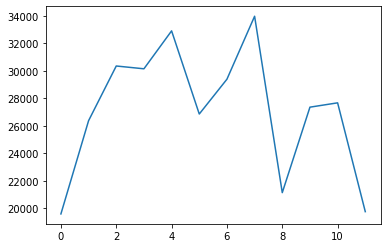

In [40]:
plt.plot(Data_group_count_seasonal['pCO2'])

In [41]:
numb_of_biom = ['0','9','10','11','12','13','15','16','17']

In [42]:
t = 0
for numb_b in numb_of_biom:
    if numb_b == '0':
        Biome_region_01 = np.ones((9,len(lat1)))
        Biome_region_02 = np.ones((9,len(lat2)))
        Biome_region_03 = np.ones((9,len(lat3)))
        Biome_region_04 = np.ones((9,len(lat4)))    
        Biome_region_05 = np.ones((9,len(lat5)))
        Biome_region_06 = np.ones((9,len(lat6)))
        Biome_region_07 = np.ones((9,len(lat7)))
        Biome_region_08 = np.ones((9,len(lat8)))
        Biome_region_09 = np.ones((9,len(lat9)))
        Biome_region_10 = np.ones((9,len(lat10)))
        Biome_region_11 = np.ones((9,len(lat11)))
        Biome_region_12 = np.ones((9,len(lat12)))
    
    print('Biom: ',numb_b)
    direct = "/Volumes/LaCie/Data/Time_Varying_Biomes.nc"
    Mask_Rod = readnc_2d(direct,'MeanBiomes')
    lon_Rod = readnc_1d(direct,'lon')
    lat_Rod = readnc_1d(direct,'lat')
                        
    Mask_Rod_Turn = np.zeros((len(lat_Rod),len(lon_Rod)))

    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            Mask_Rod_Turn[i,j] = Mask_Rod[j,i]

    lon2_R, lat2_R = np.meshgrid(lon_Rod,lat_Rod)   
        
    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat1.max() and lat_Rod[i] > lat1.min() and lon_Rod[j] < lon1.max() and lon_Rod[j] > lon1.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat1,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon1,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_01[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat1.max() and lat_Rod[i] > lat1.min() and lon_Rod[j] < lon1.max() and lon_Rod[j] > lon1.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat1,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon1,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_01[t,kk[tt]] = np.nan
                                    
    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat2.max() and lat_Rod[i] > lat2.min() and lon_Rod[j] < lon2.max() and lon_Rod[j] > lon2.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat2,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon2,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_02[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat2.max() and lat_Rod[i] > lat2.min() and lon_Rod[j] < lon2.max() and lon_Rod[j] > lon2.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat2,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon2,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_02[t,kk[tt]] = np.nan
                                    
    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat3.max() and lat_Rod[i] > lat3.min() and lon_Rod[j] < lon3.max() and lon_Rod[j] > lon3.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat3,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon3,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_03[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat3.max() and lat_Rod[i] > lat3.min() and lon_Rod[j] < lon3.max() and lon_Rod[j] > lon3.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat3,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon3,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_03[t,kk[tt]] = np.nan
                                    
    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat4.max() and lat_Rod[i] > lat4.min() and lon_Rod[j] < lon4.max() and lon_Rod[j] > lon4.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat4,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon4,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_04[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat4.max() and lat_Rod[i] > lat4.min() and lon_Rod[j] < lon4.max() and lon_Rod[j] > lon4.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat4,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon4,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_04[t,kk[tt]] = np.nan
                                    
    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat5.max() and lat_Rod[i] > lat5.min() and lon_Rod[j] < lon5.max() and lon_Rod[j] > lon5.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat5,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon5,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_05[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat5.max() and lat_Rod[i] > lat5.min() and lon_Rod[j] < lon5.max() and lon_Rod[j] > lon5.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat5,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon5,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_05[t,kk[tt]] = np.nan
                                    
    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat6.max() and lat_Rod[i] > lat6.min() and lon_Rod[j] < lon6.max() and lon_Rod[j] > lon6.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat6,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon6,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_06[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat6.max() and lat_Rod[i] > lat6.min() and lon_Rod[j] < lon6.max() and lon_Rod[j] > lon6.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat6,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon6,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_06[t,kk[tt]] = np.nan
                                    
    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat7.max() and lat_Rod[i] > lat7.min() and lon_Rod[j] < lon7.max() and lon_Rod[j] > lon7.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat7,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon7,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_07[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat7.max() and lat_Rod[i] > lat7.min() and lon_Rod[j] < lon7.max() and lon_Rod[j] > lon7.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat7,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon7,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_07[t,kk[tt]] = np.nan
                                    
    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat8.max() and lat_Rod[i] > lat8.min() and lon_Rod[j] < lon8.max() and lon_Rod[j] > lon8.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat8,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon8,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_08[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat8.max() and lat_Rod[i] > lat8.min() and lon_Rod[j] < lon8.max() and lon_Rod[j] > lon8.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat8,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon8,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_08[t,kk[tt]] = np.nan

    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat9.max() and lat_Rod[i] > lat9.min() and lon_Rod[j] < lon9.max() and lon_Rod[j] > lon9.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat9,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon9,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_09[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat9.max() and lat_Rod[i] > lat9.min() and lon_Rod[j] < lon9.max() and lon_Rod[j] > lon9.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat9,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon9,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_09[t,kk[tt]] = np.nan 
                                    
    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat10.max() and lat_Rod[i] > lat10.min() and lon_Rod[j] < lon10.max() and lon_Rod[j] > lon10.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat10,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon10,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_10[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat10.max() and lat_Rod[i] > lat10.min() and lon_Rod[j] < lon10.max() and lon_Rod[j] > lon10.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat10,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon10,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_10[t,kk[tt]] = np.nan 

    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat11.max() and lat_Rod[i] > lat11.min() and lon_Rod[j] < lon11.max() and lon_Rod[j] > lon11.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat11,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon11,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_11[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat11.max() and lat_Rod[i] > lat11.min() and lon_Rod[j] < lon11.max() and lon_Rod[j] > lon11.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat11,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon11,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_11[t,kk[tt]] = np.nan 
                                    
    for i in np.arange(0,len(lat_Rod),1):
        for j in np.arange(0,len(lon_Rod),1):
            if numb_b == '0':
                if lat_Rod[i] < lat12.max() and lat_Rod[i] > lat12.min() and lon_Rod[j] < lon12.max() and lon_Rod[j] > lon12.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82.:
                        test_lat_Rod = np.isclose(lat12,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon12,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_12[t,kk[tt]] = np.nan                                
            else:
                if lat_Rod[i] < lat12.max() and lat_Rod[i] > lat12.min() and lon_Rod[j] < lon12.max() and lon_Rod[j] > lon12.min():
                    if math.isnan(Mask_Rod_Turn[i,j]) == True or Mask_Rod_Turn[i,j] == 1 or Mask_Rod_Turn[i,j] == 8 or lat_Rod[i] > 82. or Mask_Rod_Turn[i,j] > int(numb_b) or Mask_Rod_Turn[i,j] < int(numb_b):
                        test_lat_Rod = np.isclose(lat12,lat_Rod[i],atol=0.5)
                        test_lon_Rod = np.isclose(lon12,lon_Rod[j],atol=0.5)
                        mult = test_lat_Rod * test_lon_Rod
                        kk1 = np.where(mult==True)
                        kk = kk1[0]
                        sh = kk.shape
                        if sh[0] > 0:
                            for tt in np.arange(0,sh[0],1):
                                  Biome_region_12[t,kk[tt]] = np.nan 
                                    
    t = t + 1

Biom:  0
Biom:  9
Biom:  10
Biom:  11
Biom:  12
Biom:  13
Biom:  15
Biom:  16
Biom:  17


In [43]:
day1_0 = day1 * Biome_region_01[0,:]
day2_0 = day2 * Biome_region_02[0,:]
day3_0 = day3 * Biome_region_03[0,:]
day4_0 = day4 * Biome_region_04[0,:]
day5_0 = day5 * Biome_region_05[0,:]
day6_0 = day6 * Biome_region_06[0,:]
day7_0 = day7 * Biome_region_07[0,:]
day8_0 = day8 * Biome_region_08[0,:]
day9_0 = day9 * Biome_region_09[0,:]
day10_0 = day10 * Biome_region_10[0,:]
day11_0 = day11 * Biome_region_11[0,:]
day12_0 = day12 * Biome_region_12[0,:]

month1_0 = month1 * Biome_region_01[0,:]
month2_0 = month2 * Biome_region_02[0,:]
month3_0 = month3 * Biome_region_03[0,:]
month4_0 = month4 * Biome_region_04[0,:]
month5_0 = month5 * Biome_region_05[0,:]
month6_0 = month6 * Biome_region_06[0,:]
month7_0 = month7 * Biome_region_07[0,:]
month8_0 = month8 * Biome_region_08[0,:]
month9_0 = month9 * Biome_region_09[0,:]
month10_0 = month10 * Biome_region_10[0,:]
month11_0 = month11 * Biome_region_11[0,:]
month12_0 = month12 * Biome_region_12[0,:]

year1_0 = year1 * Biome_region_01[0,:]
year2_0 = year2 * Biome_region_02[0,:]
year3_0 = year3 * Biome_region_03[0,:]
year4_0 = year4 * Biome_region_04[0,:]
year5_0 = year5 * Biome_region_05[0,:]
year6_0 = year6 * Biome_region_06[0,:]
year7_0 = year7 * Biome_region_07[0,:]
year8_0 = year8 * Biome_region_08[0,:]
year9_0 = year9 * Biome_region_09[0,:]
year10_0 = year10 * Biome_region_10[0,:]
year11_0 = year11 * Biome_region_11[0,:]
year12_0 = year12 * Biome_region_12[0,:]

lat1_0 = lat1 * Biome_region_01[0,:]
lat2_0 = lat2 * Biome_region_02[0,:]
lat3_0 = lat3 * Biome_region_03[0,:]
lat4_0 = lat4 * Biome_region_04[0,:]
lat5_0 = lat5 * Biome_region_05[0,:]
lat6_0 = lat6 * Biome_region_06[0,:]
lat7_0 = lat7 * Biome_region_07[0,:]
lat8_0 = lat8 * Biome_region_08[0,:]
lat9_0 = lat9 * Biome_region_09[0,:]
lat10_0 = lat10 * Biome_region_10[0,:]
lat11_0 = lat11 * Biome_region_11[0,:]
lat12_0 = lat12 * Biome_region_12[0,:]

lon1_0 = lon1 * Biome_region_01[0,:]
lon2_0 = lon2 * Biome_region_02[0,:]
lon3_0 = lon3 * Biome_region_03[0,:]
lon4_0 = lon4 * Biome_region_04[0,:]
lon5_0 = lon5 * Biome_region_05[0,:]
lon6_0 = lon6 * Biome_region_06[0,:]
lon7_0 = lon7 * Biome_region_07[0,:]
lon8_0 = lon8 * Biome_region_08[0,:]
lon9_0 = lon9 * Biome_region_09[0,:]
lon10_0 = lon10 * Biome_region_10[0,:]
lon11_0 = lon11 * Biome_region_11[0,:]
lon12_0 = lon12 * Biome_region_12[0,:]

pCO2_list1_0 = pCO2_list1 * Biome_region_01[0,:]
pCO2_list2_0 = pCO2_list2 * Biome_region_02[0,:]
pCO2_list3_0 = pCO2_list3 * Biome_region_03[0,:]
pCO2_list4_0 = pCO2_list4 * Biome_region_04[0,:]
pCO2_list5_0 = pCO2_list5 * Biome_region_05[0,:]
pCO2_list6_0 = pCO2_list6 * Biome_region_06[0,:]
pCO2_list7_0 = pCO2_list7 * Biome_region_07[0,:]
pCO2_list8_0 = pCO2_list8 * Biome_region_08[0,:]
pCO2_list9_0 = pCO2_list9 * Biome_region_09[0,:]
pCO2_list10_0 = pCO2_list10 * Biome_region_10[0,:]
pCO2_list11_0 = pCO2_list11 * Biome_region_11[0,:]
pCO2_list12_0 = pCO2_list12 * Biome_region_12[0,:]

In [44]:
day_comp1_0 = np.concatenate((day1_0,day2_0,day3_0,day4_0,day5_0,day6_0,day7_0,day8_0,day9_0,day10_0,day11_0,day12_0),axis =0)
month_comp1_0 = np.concatenate((month1_0,month2_0,month3_0,month4_0,month5_0,month6_0,month7_0,month8_0,month9_0,month10_0,month11_0,month12_0),axis =0)
year_comp1_0 = np.concatenate((year1_0,year2_0,year3_0,year4_0,year5_0,year6_0,year7_0,year8_0,year9_0,year10_0,year11_0,year12_0),axis =0)
lat_comp1_0 = np.concatenate((lat1_0,lat2_0,lat3_0,lat4_0,lat5_0,lat6_0,lat7_0,lat8_0,lat9_0,lat10_0,lat11_0,lat12_0),axis =0)
lon_comp1_0 = np.concatenate((lon1_0,lon2_0,lon3_0,lon4_0,lon5_0,lon6_0,lon7_0,lon8_0,lon9_0,lon10_0,lon11_0,lon12_0),axis =0)
pCO2_list_comp1_0 = np.concatenate((pCO2_list1_0,pCO2_list2_0,pCO2_list3_0,pCO2_list4_0,pCO2_list5_0,pCO2_list6_0,pCO2_list7_0,pCO2_list8_0,pCO2_list9_0,pCO2_list10_0,pCO2_list11_0,pCO2_list12_0),axis =0)

In [45]:
Data_all_0 = pd.DataFrame({'pCO2': pCO2_list_comp1_0, 'lon': lon_comp1_0, 'lat': lat_comp1_0, 'day': day_comp1_0, 'month': month_comp1_0, 'year': year_comp1_0}, columns=['pCO2','lon','lat','day','month','year'])
Data_all_0['coordinates'] = list(zip(Data_all_0.lat, Data_all_0.lon))

In [46]:
Data_all_0

,pCO2,lon,lat,day,month,year,coordinates
0,368.990335,-61.50,-57.427605,23.0,1.0,2001.0,"(-57.42760467529297, -61.5)"
1,370.384287,-61.75,-57.292767,23.0,1.0,2001.0,"(-57.29276657104492, -61.75)"
2,370.317275,-61.50,-57.292767,23.0,1.0,2001.0,"(-57.29276657104492, -61.5)"
3,370.458551,-61.75,-57.157429,23.0,1.0,2001.0,"(-57.15742874145508, -61.75)"
4,370.429908,-62.00,-57.021599,23.0,1.0,2001.0,"(-57.02159881591797, -62.0)"
...,...,...,...,...,...,...,...
325527,NaN,NaN,NaN,NaN,NaN,NaN,"(nan, nan)"
325528,NaN,NaN,NaN,NaN,NaN,NaN,"(nan, nan)"
325529,NaN,NaN,NaN,NaN,NaN,NaN,"(nan, nan)"
325530,NaN,NaN,NaN,NaN,NaN,NaN,"(nan, nan)"


In [47]:
Data_all_0.dropna(inplace=True)

In [48]:
Data_all_0

,pCO2,lon,lat,day,month,year,coordinates
0,368.990335,-61.500000,-57.427605,23.0,1.0,2001.0,"(-57.42760467529297, -61.5)"
1,370.384287,-61.750000,-57.292767,23.0,1.0,2001.0,"(-57.29276657104492, -61.75)"
2,370.317275,-61.500000,-57.292767,23.0,1.0,2001.0,"(-57.29276657104492, -61.5)"
3,370.458551,-61.750000,-57.157429,23.0,1.0,2001.0,"(-57.15742874145508, -61.75)"
4,370.429908,-62.000000,-57.021599,23.0,1.0,2001.0,"(-57.02159881591797, -62.0)"
...,...,...,...,...,...,...,...
325516,548.847516,23.700546,59.578415,29.0,12.0,2010.0,"(59.57841491699219, 23.700546264648438)"
325517,557.526552,23.947165,59.519844,29.0,12.0,2010.0,"(59.51984405517578, 23.94716453552246)"
325518,470.407904,23.557022,59.748528,29.0,12.0,2010.0,"(59.74852752685547, 23.557022094726562)"
325519,483.216439,23.804108,59.689800,29.0,12.0,2010.0,"(59.68980026245117, 23.804107666015625)"


In [52]:
Data_group_count_seasonal_0 = Data_all_0.groupby(['month']).count().reset_index()

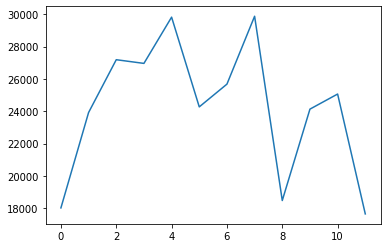

In [54]:
plt.plot(Data_group_count_seasonal_0['pCO2'])

In [60]:
day1_9 = day1 * Biome_region_01[1,:]
day2_9 = day2 * Biome_region_02[1,:]
day3_9 = day3 * Biome_region_03[1,:]
day4_9 = day4 * Biome_region_04[1,:]
day5_9 = day5 * Biome_region_05[1,:]
day6_9 = day6 * Biome_region_06[1,:]
day7_9 = day7 * Biome_region_07[1,:]
day8_9 = day8 * Biome_region_08[1,:]
day9_9 = day9 * Biome_region_09[1,:]
day10_9 = day10 * Biome_region_10[1,:]
day11_9 = day11 * Biome_region_11[1,:]
day12_9 = day12 * Biome_region_12[1,:]

month1_9 = month1 * Biome_region_01[1,:]
month2_9 = month2 * Biome_region_02[1,:]
month3_9 = month3 * Biome_region_03[1,:]
month4_9 = month4 * Biome_region_04[1,:]
month5_9 = month5 * Biome_region_05[1,:]
month6_9 = month6 * Biome_region_06[1,:]
month7_9 = month7 * Biome_region_07[1,:]
month8_9 = month8 * Biome_region_08[1,:]
month9_9 = month9 * Biome_region_09[1,:]
month10_9 = month10 * Biome_region_10[1,:]
month11_9 = month11 * Biome_region_11[1,:]
month12_9 = month12 * Biome_region_12[1,:]

year1_9 = year1 * Biome_region_01[1,:]
year2_9 = year2 * Biome_region_02[1,:]
year3_9 = year3 * Biome_region_03[1,:]
year4_9 = year4 * Biome_region_04[1,:]
year5_9 = year5 * Biome_region_05[1,:]
year6_9 = year6 * Biome_region_06[1,:]
year7_9 = year7 * Biome_region_07[1,:]
year8_9 = year8 * Biome_region_08[1,:]
year9_9 = year9 * Biome_region_09[1,:]
year10_9 = year10 * Biome_region_10[1,:]
year11_9 = year11 * Biome_region_11[1,:]
year12_9 = year12 * Biome_region_12[1,:]

lat1_9 = lat1 * Biome_region_01[1,:]
lat2_9 = lat2 * Biome_region_02[1,:]
lat3_9 = lat3 * Biome_region_03[1,:]
lat4_9 = lat4 * Biome_region_04[1,:]
lat5_9 = lat5 * Biome_region_05[1,:]
lat6_9 = lat6 * Biome_region_06[1,:]
lat7_9 = lat7 * Biome_region_07[1,:]
lat8_9 = lat8 * Biome_region_08[1,:]
lat9_9 = lat9 * Biome_region_09[1,:]
lat10_9 = lat10 * Biome_region_10[1,:]
lat11_9 = lat11 * Biome_region_11[1,:]
lat12_9 = lat12 * Biome_region_12[1,:]

lon1_9 = lon1 * Biome_region_01[1,:]
lon2_9 = lon2 * Biome_region_02[1,:]
lon3_9 = lon3 * Biome_region_03[1,:]
lon4_9 = lon4 * Biome_region_04[1,:]
lon5_9 = lon5 * Biome_region_05[1,:]
lon6_9 = lon6 * Biome_region_06[1,:]
lon7_9 = lon7 * Biome_region_07[1,:]
lon8_9 = lon8 * Biome_region_08[1,:]
lon9_9 = lon9 * Biome_region_09[1,:]
lon10_9 = lon10 * Biome_region_10[1,:]
lon11_9 = lon11 * Biome_region_11[1,:]
lon12_9 = lon12 * Biome_region_12[1,:]

pCO2_list1_9 = pCO2_list1 * Biome_region_01[1,:]
pCO2_list2_9 = pCO2_list2 * Biome_region_02[1,:]
pCO2_list3_9 = pCO2_list3 * Biome_region_03[1,:]
pCO2_list4_9 = pCO2_list4 * Biome_region_04[1,:]
pCO2_list5_9 = pCO2_list5 * Biome_region_05[1,:]
pCO2_list6_9 = pCO2_list6 * Biome_region_06[1,:]
pCO2_list7_9 = pCO2_list7 * Biome_region_07[1,:]
pCO2_list8_9 = pCO2_list8 * Biome_region_08[1,:]
pCO2_list9_9 = pCO2_list9 * Biome_region_09[1,:]
pCO2_list10_9 = pCO2_list10 * Biome_region_10[1,:]
pCO2_list11_9 = pCO2_list11 * Biome_region_11[1,:]
pCO2_list12_9 = pCO2_list12 * Biome_region_12[1,:]

In [61]:
day_comp1_9 = np.concatenate((day1_9,day2_9,day3_9,day4_9,day5_9,day6_9,day7_9,day8_9,day9_9,day10_9,day11_9,day12_9),axis =0)
month_comp1_9 = np.concatenate((month1_9,month2_9,month3_9,month4_9,month5_9,month6_9,month7_9,month8_9,month9_9,month10_9,month11_9,month12_9),axis =0)
year_comp1_9 = np.concatenate((year1_9,year2_9,year3_9,year4_9,year5_9,year6_9,year7_9,year8_9,year9_9,year10_9,year11_9,year12_9),axis =0)
lat_comp1_9 = np.concatenate((lat1_9,lat2_9,lat3_9,lat4_9,lat5_9,lat6_9,lat7_9,lat8_9,lat9_9,lat10_9,lat11_9,lat12_9),axis =0)
lon_comp1_9 = np.concatenate((lon1_9,lon2_9,lon3_9,lon4_9,lon5_9,lon6_9,lon7_9,lon8_9,lon9_9,lon10_9,lon11_9,lon12_9),axis =0)
pCO2_list_comp1_9 = np.concatenate((pCO2_list1_9,pCO2_list2_9,pCO2_list3_9,pCO2_list4_9,pCO2_list5_9,pCO2_list6_9,pCO2_list7_9,pCO2_list8_9,pCO2_list9_9,pCO2_list10_9,pCO2_list11_9,pCO2_list12_9),axis =0)

In [62]:
Data_all_9 = pd.DataFrame({'pCO2': pCO2_list_comp1_9, 'lon': lon_comp1_9, 'lat': lat_comp1_9, 'day': day_comp1_9, 'month': month_comp1_9, 'year': year_comp1_9}, columns=['pCO2','lon','lat','day','month','year'])
Data_all_9['coordinates'] = list(zip(Data_all_9.lat, Data_all_9.lon))

In [63]:
Data_all_9.dropna(inplace=True)

In [64]:
Data_group_count_seasonal_9 = Data_all_9.groupby(['month']).count().reset_index()

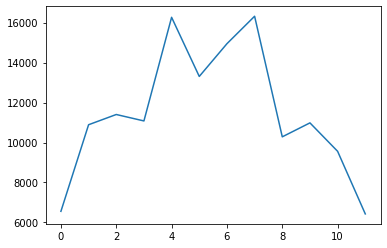

In [65]:
plt.plot(Data_group_count_seasonal_9['pCO2'])

In [66]:
day1_10 = day1 * Biome_region_01[2,:]
day2_10 = day2 * Biome_region_02[2,:]
day3_10 = day3 * Biome_region_03[2,:]
day4_10 = day4 * Biome_region_04[2,:]
day5_10 = day5 * Biome_region_05[2,:]
day6_10 = day6 * Biome_region_06[2,:]
day7_10 = day7 * Biome_region_07[2,:]
day8_10 = day8 * Biome_region_08[2,:]
day9_10 = day9 * Biome_region_09[2,:]
day10_10 = day10 * Biome_region_10[2,:]
day11_10 = day11 * Biome_region_11[2,:]
day12_10 = day12 * Biome_region_12[2,:]

month1_10 = month1 * Biome_region_01[2,:]
month2_10 = month2 * Biome_region_02[2,:]
month3_10 = month3 * Biome_region_03[2,:]
month4_10 = month4 * Biome_region_04[2,:]
month5_10 = month5 * Biome_region_05[2,:]
month6_10 = month6 * Biome_region_06[2,:]
month7_10 = month7 * Biome_region_07[2,:]
month8_10 = month8 * Biome_region_08[2,:]
month9_10 = month9 * Biome_region_09[2,:]
month10_10 = month10 * Biome_region_10[2,:]
month11_10 = month11 * Biome_region_11[2,:]
month12_10 = month12 * Biome_region_12[2,:]

year1_10 = year1 * Biome_region_01[2,:]
year2_10 = year2 * Biome_region_02[2,:]
year3_10 = year3 * Biome_region_03[2,:]
year4_10 = year4 * Biome_region_04[2,:]
year5_10 = year5 * Biome_region_05[2,:]
year6_10 = year6 * Biome_region_06[2,:]
year7_10 = year7 * Biome_region_07[2,:]
year8_10 = year8 * Biome_region_08[2,:]
year9_10 = year9 * Biome_region_09[2,:]
year10_10 = year10 * Biome_region_10[2,:]
year11_10 = year11 * Biome_region_11[2,:]
year12_10 = year12 * Biome_region_12[2,:]

lat1_10 = lat1 * Biome_region_01[2,:]
lat2_10 = lat2 * Biome_region_02[2,:]
lat3_10 = lat3 * Biome_region_03[2,:]
lat4_10 = lat4 * Biome_region_04[2,:]
lat5_10 = lat5 * Biome_region_05[2,:]
lat6_10 = lat6 * Biome_region_06[2,:]
lat7_10 = lat7 * Biome_region_07[2,:]
lat8_10 = lat8 * Biome_region_08[2,:]
lat9_10 = lat9 * Biome_region_09[2,:]
lat10_10 = lat10 * Biome_region_10[2,:]
lat11_10 = lat11 * Biome_region_11[2,:]
lat12_10 = lat12 * Biome_region_12[2,:]

lon1_10 = lon1 * Biome_region_01[2,:]
lon2_10 = lon2 * Biome_region_02[2,:]
lon3_10 = lon3 * Biome_region_03[2,:]
lon4_10 = lon4 * Biome_region_04[2,:]
lon5_10 = lon5 * Biome_region_05[2,:]
lon6_10 = lon6 * Biome_region_06[2,:]
lon7_10 = lon7 * Biome_region_07[2,:]
lon8_10 = lon8 * Biome_region_08[2,:]
lon9_10 = lon9 * Biome_region_09[2,:]
lon10_10 = lon10 * Biome_region_10[2,:]
lon11_10 = lon11 * Biome_region_11[2,:]
lon12_10 = lon12 * Biome_region_12[2,:]

pCO2_list1_10 = pCO2_list1 * Biome_region_01[2,:]
pCO2_list2_10 = pCO2_list2 * Biome_region_02[2,:]
pCO2_list3_10 = pCO2_list3 * Biome_region_03[2,:]
pCO2_list4_10 = pCO2_list4 * Biome_region_04[2,:]
pCO2_list5_10 = pCO2_list5 * Biome_region_05[2,:]
pCO2_list6_10 = pCO2_list6 * Biome_region_06[2,:]
pCO2_list7_10 = pCO2_list7 * Biome_region_07[2,:]
pCO2_list8_10 = pCO2_list8 * Biome_region_08[2,:]
pCO2_list9_10 = pCO2_list9 * Biome_region_09[2,:]
pCO2_list10_10 = pCO2_list10 * Biome_region_10[2,:]
pCO2_list11_10 = pCO2_list11 * Biome_region_11[2,:]
pCO2_list12_10 = pCO2_list12 * Biome_region_12[2,:]

In [67]:
day_comp1_10 = np.concatenate((day1_10,day2_10,day3_10,day4_10,day5_10,day6_10,day7_10,day8_10,day9_10,day10_10,day11_10,day12_10),axis =0)
month_comp1_10 = np.concatenate((month1_10,month2_10,month3_10,month4_10,month5_10,month6_10,month7_10,month8_10,month9_10,month10_10,month11_10,month12_10),axis =0)
year_comp1_10 = np.concatenate((year1_10,year2_10,year3_10,year4_10,year5_10,year6_10,year7_10,year8_10,year9_10,year10_10,year11_10,year12_10),axis =0)
lat_comp1_10 = np.concatenate((lat1_10,lat2_10,lat3_10,lat4_10,lat5_10,lat6_10,lat7_10,lat8_10,lat9_10,lat10_10,lat11_10,lat12_10),axis =0)
lon_comp1_10 = np.concatenate((lon1_10,lon2_10,lon3_10,lon4_10,lon5_10,lon6_10,lon7_10,lon8_10,lon9_10,lon10_10,lon11_10,lon12_10),axis =0)
pCO2_list_comp1_10 = np.concatenate((pCO2_list1_10,pCO2_list2_10,pCO2_list3_10,pCO2_list4_10,pCO2_list5_10,pCO2_list6_10,pCO2_list7_10,pCO2_list8_10,pCO2_list9_10,pCO2_list10_10,pCO2_list11_10,pCO2_list12_10),axis =0)

In [68]:
Data_all_10 = pd.DataFrame({'pCO2': pCO2_list_comp1_10, 'lon': lon_comp1_10, 'lat': lat_comp1_10, 'day': day_comp1_10, 'month': month_comp1_10, 'year': year_comp1_10}, columns=['pCO2','lon','lat','day','month','year'])
Data_all_10['coordinates'] = list(zip(Data_all_10.lat, Data_all_10.lon))

In [69]:
Data_all_10.dropna(inplace=True)

In [70]:
Data_group_count_seasonal_10 = Data_all_10.groupby(['month']).count().reset_index()

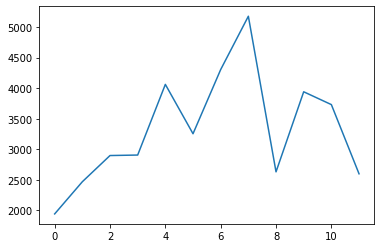

In [71]:
plt.plot(Data_group_count_seasonal_10['pCO2'])

In [72]:
day1_11 = day1 * Biome_region_01[3,:]
day2_11 = day2 * Biome_region_02[3,:]
day3_11 = day3 * Biome_region_03[3,:]
day4_11 = day4 * Biome_region_04[3,:]
day5_11 = day5 * Biome_region_05[3,:]
day6_11 = day6 * Biome_region_06[3,:]
day7_11 = day7 * Biome_region_07[3,:]
day8_11 = day8 * Biome_region_08[3,:]
day9_11 = day9 * Biome_region_09[3,:]
day10_11 = day10 * Biome_region_10[3,:]
day11_11 = day11 * Biome_region_11[3,:]
day12_11 = day12 * Biome_region_12[3,:]

month1_11 = month1 * Biome_region_01[3,:]
month2_11 = month2 * Biome_region_02[3,:]
month3_11 = month3 * Biome_region_03[3,:]
month4_11 = month4 * Biome_region_04[3,:]
month5_11 = month5 * Biome_region_05[3,:]
month6_11 = month6 * Biome_region_06[3,:]
month7_11 = month7 * Biome_region_07[3,:]
month8_11 = month8 * Biome_region_08[3,:]
month9_11 = month9 * Biome_region_09[3,:]
month10_11 = month10 * Biome_region_10[3,:]
month11_11 = month11 * Biome_region_11[3,:]
month12_11 = month12 * Biome_region_12[3,:]

year1_11 = year1 * Biome_region_01[3,:]
year2_11 = year2 * Biome_region_02[3,:]
year3_11 = year3 * Biome_region_03[3,:]
year4_11 = year4 * Biome_region_04[3,:]
year5_11 = year5 * Biome_region_05[3,:]
year6_11 = year6 * Biome_region_06[3,:]
year7_11 = year7 * Biome_region_07[3,:]
year8_11 = year8 * Biome_region_08[3,:]
year9_11 = year9 * Biome_region_09[3,:]
year10_11 = year10 * Biome_region_10[3,:]
year11_11 = year11 * Biome_region_11[3,:]
year12_11 = year12 * Biome_region_12[3,:]

lat1_11 = lat1 * Biome_region_01[3,:]
lat2_11 = lat2 * Biome_region_02[3,:]
lat3_11 = lat3 * Biome_region_03[3,:]
lat4_11 = lat4 * Biome_region_04[3,:]
lat5_11 = lat5 * Biome_region_05[3,:]
lat6_11 = lat6 * Biome_region_06[3,:]
lat7_11 = lat7 * Biome_region_07[3,:]
lat8_11 = lat8 * Biome_region_08[3,:]
lat9_11 = lat9 * Biome_region_09[3,:]
lat10_11 = lat10 * Biome_region_10[3,:]
lat11_11 = lat11 * Biome_region_11[3,:]
lat12_11 = lat12 * Biome_region_12[3,:]

lon1_11 = lon1 * Biome_region_01[3,:]
lon2_11 = lon2 * Biome_region_02[3,:]
lon3_11 = lon3 * Biome_region_03[3,:]
lon4_11 = lon4 * Biome_region_04[3,:]
lon5_11 = lon5 * Biome_region_05[3,:]
lon6_11 = lon6 * Biome_region_06[3,:]
lon7_11 = lon7 * Biome_region_07[3,:]
lon8_11 = lon8 * Biome_region_08[3,:]
lon9_11 = lon9 * Biome_region_09[3,:]
lon10_11 = lon10 * Biome_region_10[3,:]
lon11_11 = lon11 * Biome_region_11[3,:]
lon12_11 = lon12 * Biome_region_12[3,:]

pCO2_list1_11 = pCO2_list1 * Biome_region_01[3,:]
pCO2_list2_11 = pCO2_list2 * Biome_region_02[3,:]
pCO2_list3_11 = pCO2_list3 * Biome_region_03[3,:]
pCO2_list4_11 = pCO2_list4 * Biome_region_04[3,:]
pCO2_list5_11 = pCO2_list5 * Biome_region_05[3,:]
pCO2_list6_11 = pCO2_list6 * Biome_region_06[3,:]
pCO2_list7_11 = pCO2_list7 * Biome_region_07[3,:]
pCO2_list8_11 = pCO2_list8 * Biome_region_08[3,:]
pCO2_list9_11 = pCO2_list9 * Biome_region_09[3,:]
pCO2_list10_11 = pCO2_list10 * Biome_region_10[3,:]
pCO2_list11_11 = pCO2_list11 * Biome_region_11[3,:]
pCO2_list12_11 = pCO2_list12 * Biome_region_12[3,:]

In [73]:
day_comp1_11 = np.concatenate((day1_11,day2_11,day3_11,day4_11,day5_11,day6_11,day7_11,day8_11,day9_11,day10_11,day11_11,day12_11),axis =0)
month_comp1_11 = np.concatenate((month1_11,month2_11,month3_11,month4_11,month5_11,month6_11,month7_11,month8_11,month9_11,month10_11,month11_11,month12_11),axis =0)
year_comp1_11 = np.concatenate((year1_11,year2_11,year3_11,year4_11,year5_11,year6_11,year7_11,year8_11,year9_11,year10_11,year11_11,year12_11),axis =0)
lat_comp1_11 = np.concatenate((lat1_11,lat2_11,lat3_11,lat4_11,lat5_11,lat6_11,lat7_11,lat8_11,lat9_11,lat10_11,lat11_11,lat12_11),axis =0)
lon_comp1_11 = np.concatenate((lon1_11,lon2_11,lon3_11,lon4_11,lon5_11,lon6_11,lon7_11,lon8_11,lon9_11,lon10_11,lon11_11,lon12_11),axis =0)
pCO2_list_comp1_11 = np.concatenate((pCO2_list1_11,pCO2_list2_11,pCO2_list3_11,pCO2_list4_11,pCO2_list5_11,pCO2_list6_11,pCO2_list7_11,pCO2_list8_11,pCO2_list9_11,pCO2_list10_11,pCO2_list11_11,pCO2_list12_11),axis =0)

In [74]:
Data_all_11 = pd.DataFrame({'pCO2': pCO2_list_comp1_11, 'lon': lon_comp1_11, 'lat': lat_comp1_11, 'day': day_comp1_11, 'month': month_comp1_11, 'year': year_comp1_11}, columns=['pCO2','lon','lat','day','month','year'])
Data_all_11['coordinates'] = list(zip(Data_all_11.lat, Data_all_11.lon))

In [75]:
Data_all_11.dropna(inplace=True)

In [76]:
Data_group_count_seasonal_11 = Data_all_11.groupby(['month']).count().reset_index()

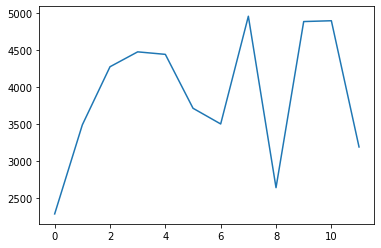

In [77]:
plt.plot(Data_group_count_seasonal_11['pCO2'])

In [78]:
day1_12 = day1 * Biome_region_01[4,:]
day2_12 = day2 * Biome_region_02[4,:]
day3_12 = day3 * Biome_region_03[4,:]
day4_12 = day4 * Biome_region_04[4,:]
day5_12 = day5 * Biome_region_05[4,:]
day6_12 = day6 * Biome_region_06[4,:]
day7_12 = day7 * Biome_region_07[4,:]
day8_12 = day8 * Biome_region_08[4,:]
day9_12 = day9 * Biome_region_09[4,:]
day10_12 = day10 * Biome_region_10[4,:]
day11_12 = day11 * Biome_region_11[4,:]
day12_12 = day12 * Biome_region_12[4,:]

month1_12 = month1 * Biome_region_01[4,:]
month2_12 = month2 * Biome_region_02[4,:]
month3_12 = month3 * Biome_region_03[4,:]
month4_12 = month4 * Biome_region_04[4,:]
month5_12 = month5 * Biome_region_05[4,:]
month6_12 = month6 * Biome_region_06[4,:]
month7_12 = month7 * Biome_region_07[4,:]
month8_12 = month8 * Biome_region_08[4,:]
month9_12 = month9 * Biome_region_09[4,:]
month10_12 = month10 * Biome_region_10[4,:]
month11_12 = month11 * Biome_region_11[4,:]
month12_12 = month12 * Biome_region_12[4,:]

year1_12 = year1 * Biome_region_01[4,:]
year2_12 = year2 * Biome_region_02[4,:]
year3_12 = year3 * Biome_region_03[4,:]
year4_12 = year4 * Biome_region_04[4,:]
year5_12 = year5 * Biome_region_05[4,:]
year6_12 = year6 * Biome_region_06[4,:]
year7_12 = year7 * Biome_region_07[4,:]
year8_12 = year8 * Biome_region_08[4,:]
year9_12 = year9 * Biome_region_09[4,:]
year10_12 = year10 * Biome_region_10[4,:]
year11_12 = year11 * Biome_region_11[4,:]
year12_12 = year12 * Biome_region_12[4,:]

lat1_12 = lat1 * Biome_region_01[4,:]
lat2_12 = lat2 * Biome_region_02[4,:]
lat3_12 = lat3 * Biome_region_03[4,:]
lat4_12 = lat4 * Biome_region_04[4,:]
lat5_12 = lat5 * Biome_region_05[4,:]
lat6_12 = lat6 * Biome_region_06[4,:]
lat7_12 = lat7 * Biome_region_07[4,:]
lat8_12 = lat8 * Biome_region_08[4,:]
lat9_12 = lat9 * Biome_region_09[4,:]
lat10_12 = lat10 * Biome_region_10[4,:]
lat11_12 = lat11 * Biome_region_11[4,:]
lat12_12 = lat12 * Biome_region_12[4,:]

lon1_12 = lon1 * Biome_region_01[4,:]
lon2_12 = lon2 * Biome_region_02[4,:]
lon3_12 = lon3 * Biome_region_03[4,:]
lon4_12 = lon4 * Biome_region_04[4,:]
lon5_12 = lon5 * Biome_region_05[4,:]
lon6_12 = lon6 * Biome_region_06[4,:]
lon7_12 = lon7 * Biome_region_07[4,:]
lon8_12 = lon8 * Biome_region_08[4,:]
lon9_12 = lon9 * Biome_region_09[4,:]
lon10_12 = lon10 * Biome_region_10[4,:]
lon11_12 = lon11 * Biome_region_11[4,:]
lon12_12 = lon12 * Biome_region_12[4,:]

pCO2_list1_12 = pCO2_list1 * Biome_region_01[4,:]
pCO2_list2_12 = pCO2_list2 * Biome_region_02[4,:]
pCO2_list3_12 = pCO2_list3 * Biome_region_03[4,:]
pCO2_list4_12 = pCO2_list4 * Biome_region_04[4,:]
pCO2_list5_12 = pCO2_list5 * Biome_region_05[4,:]
pCO2_list6_12 = pCO2_list6 * Biome_region_06[4,:]
pCO2_list7_12 = pCO2_list7 * Biome_region_07[4,:]
pCO2_list8_12 = pCO2_list8 * Biome_region_08[4,:]
pCO2_list9_12 = pCO2_list9 * Biome_region_09[4,:]
pCO2_list10_12 = pCO2_list10 * Biome_region_10[4,:]
pCO2_list11_12 = pCO2_list11 * Biome_region_11[4,:]
pCO2_list12_12 = pCO2_list12 * Biome_region_12[4,:]

In [79]:
day_comp1_12 = np.concatenate((day1_12,day2_12,day3_12,day4_12,day5_12,day6_12,day7_12,day8_12,day9_12,day10_12,day11_12,day12_12),axis =0)
month_comp1_12 = np.concatenate((month1_12,month2_12,month3_12,month4_12,month5_12,month6_12,month7_12,month8_12,month9_12,month10_12,month11_12,month12_12),axis =0)
year_comp1_12 = np.concatenate((year1_12,year2_12,year3_12,year4_12,year5_12,year6_12,year7_12,year8_12,year9_12,year10_12,year11_12,year12_12),axis =0)
lat_comp1_12 = np.concatenate((lat1_12,lat2_12,lat3_12,lat4_12,lat5_12,lat6_12,lat7_12,lat8_12,lat9_12,lat10_12,lat11_12,lat12_12),axis =0)
lon_comp1_12 = np.concatenate((lon1_12,lon2_12,lon3_12,lon4_12,lon5_12,lon6_12,lon7_12,lon8_12,lon9_12,lon10_12,lon11_12,lon12_12),axis =0)
pCO2_list_comp1_12 = np.concatenate((pCO2_list1_12,pCO2_list2_12,pCO2_list3_12,pCO2_list4_12,pCO2_list5_12,pCO2_list6_12,pCO2_list7_12,pCO2_list8_12,pCO2_list9_12,pCO2_list10_12,pCO2_list11_12,pCO2_list12_12),axis =0)


In [80]:
Data_all_12 = pd.DataFrame({'pCO2': pCO2_list_comp1_12, 'lon': lon_comp1_12, 'lat': lat_comp1_12, 'day': day_comp1_12, 'month': month_comp1_12, 'year': year_comp1_12}, columns=['pCO2','lon','lat','day','month','year'])
Data_all_12['coordinates'] = list(zip(Data_all_12.lat, Data_all_12.lon))

In [81]:
Data_all_12.dropna(inplace=True)

In [82]:
Data_group_count_seasonal_12 = Data_all_12.groupby(['month']).count().reset_index()

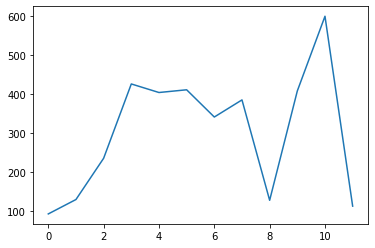

In [83]:
plt.plot(Data_group_count_seasonal_12['pCO2'])

In [84]:
day1_13 = day1 * Biome_region_01[5,:]
day2_13 = day2 * Biome_region_02[5,:]
day3_13 = day3 * Biome_region_03[5,:]
day4_13 = day4 * Biome_region_04[5,:]
day5_13 = day5 * Biome_region_05[5,:]
day6_13 = day6 * Biome_region_06[5,:]
day7_13 = day7 * Biome_region_07[5,:]
day8_13 = day8 * Biome_region_08[5,:]
day9_13 = day9 * Biome_region_09[5,:]
day10_13 = day10 * Biome_region_10[5,:]
day11_13 = day11 * Biome_region_11[5,:]
day12_13 = day12 * Biome_region_12[5,:]

month1_13 = month1 * Biome_region_01[5,:]
month2_13 = month2 * Biome_region_02[5,:]
month3_13 = month3 * Biome_region_03[5,:]
month4_13 = month4 * Biome_region_04[5,:]
month5_13 = month5 * Biome_region_05[5,:]
month6_13 = month6 * Biome_region_06[5,:]
month7_13 = month7 * Biome_region_07[5,:]
month8_13 = month8 * Biome_region_08[5,:]
month9_13 = month9 * Biome_region_09[5,:]
month10_13 = month10 * Biome_region_10[5,:]
month11_13 = month11 * Biome_region_11[5,:]
month12_13 = month12 * Biome_region_12[5,:]

year1_13 = year1 * Biome_region_01[5,:]
year2_13 = year2 * Biome_region_02[5,:]
year3_13 = year3 * Biome_region_03[5,:]
year4_13 = year4 * Biome_region_04[5,:]
year5_13 = year5 * Biome_region_05[5,:]
year6_13 = year6 * Biome_region_06[5,:]
year7_13 = year7 * Biome_region_07[5,:]
year8_13 = year8 * Biome_region_08[5,:]
year9_13 = year9 * Biome_region_09[5,:]
year10_13 = year10 * Biome_region_10[5,:]
year11_13 = year11 * Biome_region_11[5,:]
year12_13 = year12 * Biome_region_12[5,:]

lat1_13 = lat1 * Biome_region_01[5,:]
lat2_13 = lat2 * Biome_region_02[5,:]
lat3_13 = lat3 * Biome_region_03[5,:]
lat4_13 = lat4 * Biome_region_04[5,:]
lat5_13 = lat5 * Biome_region_05[5,:]
lat6_13 = lat6 * Biome_region_06[5,:]
lat7_13 = lat7 * Biome_region_07[5,:]
lat8_13 = lat8 * Biome_region_08[5,:]
lat9_13 = lat9 * Biome_region_09[5,:]
lat10_13 = lat10 * Biome_region_10[5,:]
lat11_13 = lat11 * Biome_region_11[5,:]
lat12_13 = lat12 * Biome_region_12[5,:]

lon1_13 = lon1 * Biome_region_01[5,:]
lon2_13 = lon2 * Biome_region_02[5,:]
lon3_13 = lon3 * Biome_region_03[5,:]
lon4_13 = lon4 * Biome_region_04[5,:]
lon5_13 = lon5 * Biome_region_05[5,:]
lon6_13 = lon6 * Biome_region_06[5,:]
lon7_13 = lon7 * Biome_region_07[5,:]
lon8_13 = lon8 * Biome_region_08[5,:]
lon9_13 = lon9 * Biome_region_09[5,:]
lon10_13 = lon10 * Biome_region_10[5,:]
lon11_13 = lon11 * Biome_region_11[5,:]
lon12_13 = lon12 * Biome_region_12[5,:]

pCO2_list1_13 = pCO2_list1 * Biome_region_01[5,:]
pCO2_list2_13 = pCO2_list2 * Biome_region_02[5,:]
pCO2_list3_13 = pCO2_list3 * Biome_region_03[5,:]
pCO2_list4_13 = pCO2_list4 * Biome_region_04[5,:]
pCO2_list5_13 = pCO2_list5 * Biome_region_05[5,:]
pCO2_list6_13 = pCO2_list6 * Biome_region_06[5,:]
pCO2_list7_13 = pCO2_list7 * Biome_region_07[5,:]
pCO2_list8_13 = pCO2_list8 * Biome_region_08[5,:]
pCO2_list9_13 = pCO2_list9 * Biome_region_09[5,:]
pCO2_list10_13 = pCO2_list10 * Biome_region_10[5,:]
pCO2_list11_13 = pCO2_list11 * Biome_region_11[5,:]
pCO2_list12_13 = pCO2_list12 * Biome_region_12[5,:]

In [85]:
day_comp1_13 = np.concatenate((day1_13,day2_13,day3_13,day4_13,day5_13,day6_13,day7_13,day8_13,day9_13,day10_13,day11_13,day12_13),axis =0)
month_comp1_13 = np.concatenate((month1_13,month2_13,month3_13,month4_13,month5_13,month6_13,month7_13,month8_13,month9_13,month10_13,month11_13,month12_13),axis =0)
year_comp1_13 = np.concatenate((year1_13,year2_13,year3_13,year4_13,year5_13,year6_13,year7_13,year8_13,year9_13,year10_13,year11_13,year12_13),axis =0)
lat_comp1_13 = np.concatenate((lat1_13,lat2_13,lat3_13,lat4_13,lat5_13,lat6_13,lat7_13,lat8_13,lat9_13,lat10_13,lat11_13,lat12_13),axis =0)
lon_comp1_13 = np.concatenate((lon1_13,lon2_13,lon3_13,lon4_13,lon5_13,lon6_13,lon7_13,lon8_13,lon9_13,lon10_13,lon11_13,lon12_13),axis =0)
pCO2_list_comp1_13 = np.concatenate((pCO2_list1_13,pCO2_list2_13,pCO2_list3_13,pCO2_list4_13,pCO2_list5_13,pCO2_list6_13,pCO2_list7_13,pCO2_list8_13,pCO2_list9_13,pCO2_list10_13,pCO2_list11_13,pCO2_list12_13),axis =0)


In [87]:
Data_all_13 = pd.DataFrame({'pCO2': pCO2_list_comp1_13, 'lon': lon_comp1_13, 'lat': lat_comp1_13, 'day': day_comp1_13, 'month': month_comp1_13, 'year': year_comp1_13}, columns=['pCO2','lon','lat','day','month','year'])
Data_all_13['coordinates'] = list(zip(Data_all_13.lat, Data_all_13.lon))

In [88]:
Data_all_13.dropna(inplace=True)

In [89]:
Data_group_count_seasonal_13 = Data_all_13.groupby(['month']).count().reset_index()

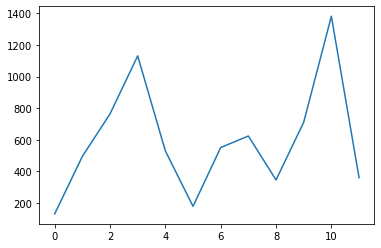

In [90]:
plt.plot(Data_group_count_seasonal_13['pCO2'])

In [91]:
day1_15 = day1 * Biome_region_01[6,:]
day2_15 = day2 * Biome_region_02[6,:]
day3_15 = day3 * Biome_region_03[6,:]
day4_15 = day4 * Biome_region_04[6,:]
day5_15 = day5 * Biome_region_05[6,:]
day6_15 = day6 * Biome_region_06[6,:]
day7_15 = day7 * Biome_region_07[6,:]
day8_15 = day8 * Biome_region_08[6,:]
day9_15 = day9 * Biome_region_09[6,:]
day10_15 = day10 * Biome_region_10[6,:]
day11_15 = day11 * Biome_region_11[6,:]
day12_15 = day12 * Biome_region_12[6,:]

month1_15 = month1 * Biome_region_01[6,:]
month2_15 = month2 * Biome_region_02[6,:]
month3_15 = month3 * Biome_region_03[6,:]
month4_15 = month4 * Biome_region_04[6,:]
month5_15 = month5 * Biome_region_05[6,:]
month6_15 = month6 * Biome_region_06[6,:]
month7_15 = month7 * Biome_region_07[6,:]
month8_15 = month8 * Biome_region_08[6,:]
month9_15 = month9 * Biome_region_09[6,:]
month10_15 = month10 * Biome_region_10[6,:]
month11_15 = month11 * Biome_region_11[6,:]
month12_15 = month12 * Biome_region_12[6,:]

year1_15 = year1 * Biome_region_01[6,:]
year2_15 = year2 * Biome_region_02[6,:]
year3_15 = year3 * Biome_region_03[6,:]
year4_15 = year4 * Biome_region_04[6,:]
year5_15 = year5 * Biome_region_05[6,:]
year6_15 = year6 * Biome_region_06[6,:]
year7_15 = year7 * Biome_region_07[6,:]
year8_15 = year8 * Biome_region_08[6,:]
year9_15 = year9 * Biome_region_09[6,:]
year10_15 = year10 * Biome_region_10[6,:]
year11_15 = year11 * Biome_region_11[6,:]
year12_15 = year12 * Biome_region_12[6,:]

lat1_15 = lat1 * Biome_region_01[6,:]
lat2_15 = lat2 * Biome_region_02[6,:]
lat3_15 = lat3 * Biome_region_03[6,:]
lat4_15 = lat4 * Biome_region_04[6,:]
lat5_15 = lat5 * Biome_region_05[6,:]
lat6_15 = lat6 * Biome_region_06[6,:]
lat7_15 = lat7 * Biome_region_07[6,:]
lat8_15 = lat8 * Biome_region_08[6,:]
lat9_15 = lat9 * Biome_region_09[6,:]
lat10_15 = lat10 * Biome_region_10[6,:]
lat11_15 = lat11 * Biome_region_11[6,:]
lat12_15 = lat12 * Biome_region_12[6,:]

lon1_15 = lon1 * Biome_region_01[6,:]
lon2_15 = lon2 * Biome_region_02[6,:]
lon3_15 = lon3 * Biome_region_03[6,:]
lon4_15 = lon4 * Biome_region_04[6,:]
lon5_15 = lon5 * Biome_region_05[6,:]
lon6_15 = lon6 * Biome_region_06[6,:]
lon7_15 = lon7 * Biome_region_07[6,:]
lon8_15 = lon8 * Biome_region_08[6,:]
lon9_15 = lon9 * Biome_region_09[6,:]
lon10_15 = lon10 * Biome_region_10[6,:]
lon11_15 = lon11 * Biome_region_11[6,:]
lon12_15 = lon12 * Biome_region_12[6,:]

pCO2_list1_15 = pCO2_list1 * Biome_region_01[6,:]
pCO2_list2_15 = pCO2_list2 * Biome_region_02[6,:]
pCO2_list3_15 = pCO2_list3 * Biome_region_03[6,:]
pCO2_list4_15 = pCO2_list4 * Biome_region_04[6,:]
pCO2_list5_15 = pCO2_list5 * Biome_region_05[6,:]
pCO2_list6_15 = pCO2_list6 * Biome_region_06[6,:]
pCO2_list7_15 = pCO2_list7 * Biome_region_07[6,:]
pCO2_list8_15 = pCO2_list8 * Biome_region_08[6,:]
pCO2_list9_15 = pCO2_list9 * Biome_region_09[6,:]
pCO2_list10_15 = pCO2_list10 * Biome_region_10[6,:]
pCO2_list11_15 = pCO2_list11 * Biome_region_11[6,:]
pCO2_list12_15 = pCO2_list12 * Biome_region_12[6,:]

In [92]:
day_comp1_15 = np.concatenate((day1_15,day2_15,day3_15,day4_15,day5_15,day6_15,day7_15,day8_15,day9_15,day10_15,day11_15,day12_15),axis =0)
month_comp1_15 = np.concatenate((month1_15,month2_15,month3_15,month4_15,month5_15,month6_15,month7_15,month8_15,month9_15,month10_15,month11_15,month12_15),axis =0)
year_comp1_15 = np.concatenate((year1_15,year2_15,year3_15,year4_15,year5_15,year6_15,year7_15,year8_15,year9_15,year10_15,year11_15,year12_15),axis =0)
lat_comp1_15 = np.concatenate((lat1_15,lat2_15,lat3_15,lat4_15,lat5_15,lat6_15,lat7_15,lat8_15,lat9_15,lat10_15,lat11_15,lat12_15),axis =0)
lon_comp1_15 = np.concatenate((lon1_15,lon2_15,lon3_15,lon4_15,lon5_15,lon6_15,lon7_15,lon8_15,lon9_15,lon10_15,lon11_15,lon12_15),axis =0)
pCO2_list_comp1_15 = np.concatenate((pCO2_list1_15,pCO2_list2_15,pCO2_list3_15,pCO2_list4_15,pCO2_list5_15,pCO2_list6_15,pCO2_list7_15,pCO2_list8_15,pCO2_list9_15,pCO2_list10_15,pCO2_list11_15,pCO2_list12_15),axis =0)


In [93]:
Data_all_15 = pd.DataFrame({'pCO2': pCO2_list_comp1_15, 'lon': lon_comp1_15, 'lat': lat_comp1_15, 'day': day_comp1_15, 'month': month_comp1_15, 'year': year_comp1_15}, columns=['pCO2','lon','lat','day','month','year'])
Data_all_15['coordinates'] = list(zip(Data_all_15.lat, Data_all_15.lon))

In [94]:
Data_all_15.dropna(inplace=True)

In [95]:
Data_group_count_seasonal_15 = Data_all_15.groupby(['month']).count().reset_index()

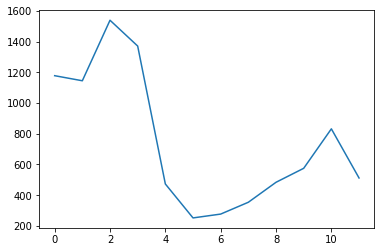

In [96]:
plt.plot(Data_group_count_seasonal_15['pCO2'])

In [97]:
day1_16 = day1 * Biome_region_01[7,:]
day2_16 = day2 * Biome_region_02[7,:]
day3_16 = day3 * Biome_region_03[7,:]
day4_16 = day4 * Biome_region_04[7,:]
day5_16 = day5 * Biome_region_05[7,:]
day6_16 = day6 * Biome_region_06[7,:]
day7_16 = day7 * Biome_region_07[7,:]
day8_16 = day8 * Biome_region_08[7,:]
day9_16 = day9 * Biome_region_09[7,:]
day10_16 = day10 * Biome_region_10[7,:]
day11_16 = day11 * Biome_region_11[7,:]
day12_16 = day12 * Biome_region_12[7,:]

month1_16 = month1 * Biome_region_01[7,:]
month2_16 = month2 * Biome_region_02[7,:]
month3_16 = month3 * Biome_region_03[7,:]
month4_16 = month4 * Biome_region_04[7,:]
month5_16 = month5 * Biome_region_05[7,:]
month6_16 = month6 * Biome_region_06[7,:]
month7_16 = month7 * Biome_region_07[7,:]
month8_16 = month8 * Biome_region_08[7,:]
month9_16 = month9 * Biome_region_09[7,:]
month10_16 = month10 * Biome_region_10[7,:]
month11_16 = month11 * Biome_region_11[7,:]
month12_16 = month12 * Biome_region_12[7,:]

year1_16 = year1 * Biome_region_01[7,:]
year2_16 = year2 * Biome_region_02[7,:]
year3_16 = year3 * Biome_region_03[7,:]
year4_16 = year4 * Biome_region_04[7,:]
year5_16 = year5 * Biome_region_05[7,:]
year6_16 = year6 * Biome_region_06[7,:]
year7_16 = year7 * Biome_region_07[7,:]
year8_16 = year8 * Biome_region_08[7,:]
year9_16 = year9 * Biome_region_09[7,:]
year10_16 = year10 * Biome_region_10[7,:]
year11_16 = year11 * Biome_region_11[7,:]
year12_16 = year12 * Biome_region_12[7,:]

lat1_16 = lat1 * Biome_region_01[7,:]
lat2_16 = lat2 * Biome_region_02[7,:]
lat3_16 = lat3 * Biome_region_03[7,:]
lat4_16 = lat4 * Biome_region_04[7,:]
lat5_16 = lat5 * Biome_region_05[7,:]
lat6_16 = lat6 * Biome_region_06[7,:]
lat7_16 = lat7 * Biome_region_07[7,:]
lat8_16 = lat8 * Biome_region_08[7,:]
lat9_16 = lat9 * Biome_region_09[7,:]
lat10_16 = lat10 * Biome_region_10[7,:]
lat11_16 = lat11 * Biome_region_11[7,:]
lat12_16 = lat12 * Biome_region_12[7,:]

lon1_16 = lon1 * Biome_region_01[7,:]
lon2_16 = lon2 * Biome_region_02[7,:]
lon3_16 = lon3 * Biome_region_03[7,:]
lon4_16 = lon4 * Biome_region_04[7,:]
lon5_16 = lon5 * Biome_region_05[7,:]
lon6_16 = lon6 * Biome_region_06[7,:]
lon7_16 = lon7 * Biome_region_07[7,:]
lon8_16 = lon8 * Biome_region_08[7,:]
lon9_16 = lon9 * Biome_region_09[7,:]
lon10_16 = lon10 * Biome_region_10[7,:]
lon11_16 = lon11 * Biome_region_11[7,:]
lon12_16 = lon12 * Biome_region_12[7,:]

pCO2_list1_16 = pCO2_list1 * Biome_region_01[7,:]
pCO2_list2_16 = pCO2_list2 * Biome_region_02[7,:]
pCO2_list3_16 = pCO2_list3 * Biome_region_03[7,:]
pCO2_list4_16 = pCO2_list4 * Biome_region_04[7,:]
pCO2_list5_16 = pCO2_list5 * Biome_region_05[7,:]
pCO2_list6_16 = pCO2_list6 * Biome_region_06[7,:]
pCO2_list7_16 = pCO2_list7 * Biome_region_07[7,:]
pCO2_list8_16 = pCO2_list8 * Biome_region_08[7,:]
pCO2_list9_16 = pCO2_list9 * Biome_region_09[7,:]
pCO2_list10_16 = pCO2_list10 * Biome_region_10[7,:]
pCO2_list11_16 = pCO2_list11 * Biome_region_11[7,:]
pCO2_list12_16 = pCO2_list12 * Biome_region_12[7,:]

In [98]:
day_comp1_16 = np.concatenate((day1_16,day2_16,day3_16,day4_16,day5_16,day6_16,day7_16,day8_16,day9_16,day10_16,day11_16,day12_16),axis =0)
month_comp1_16 = np.concatenate((month1_16,month2_16,month3_16,month4_16,month5_16,month6_16,month7_16,month8_16,month9_16,month10_16,month11_16,month12_16),axis =0)
year_comp1_16 = np.concatenate((year1_16,year2_16,year3_16,year4_16,year5_16,year6_16,year7_16,year8_16,year9_16,year10_16,year11_16,year12_16),axis =0)
lat_comp1_16 = np.concatenate((lat1_16,lat2_16,lat3_16,lat4_16,lat5_16,lat6_16,lat7_16,lat8_16,lat9_16,lat10_16,lat11_16,lat12_16),axis =0)
lon_comp1_16 = np.concatenate((lon1_16,lon2_16,lon3_16,lon4_16,lon5_16,lon6_16,lon7_16,lon8_16,lon9_16,lon10_16,lon11_16,lon12_16),axis =0)
pCO2_list_comp1_16 = np.concatenate((pCO2_list1_16,pCO2_list2_16,pCO2_list3_16,pCO2_list4_16,pCO2_list5_16,pCO2_list6_16,pCO2_list7_16,pCO2_list8_16,pCO2_list9_16,pCO2_list10_16,pCO2_list11_16,pCO2_list12_16),axis =0)


In [99]:
Data_all_16 = pd.DataFrame({'pCO2': pCO2_list_comp1_16, 'lon': lon_comp1_16, 'lat': lat_comp1_16, 'day': day_comp1_16, 'month': month_comp1_16, 'year': year_comp1_16}, columns=['pCO2','lon','lat','day','month','year'])
Data_all_16['coordinates'] = list(zip(Data_all_16.lat, Data_all_16.lon))

In [100]:
Data_all_16.dropna(inplace=True)

In [101]:
Data_group_count_seasonal_16 = Data_all_16.groupby(['month']).count().reset_index()

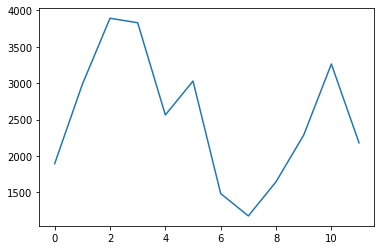

In [102]:
plt.plot(Data_group_count_seasonal_16['pCO2'])

In [104]:
day1_17 = day1 * Biome_region_01[8,:]
day2_17 = day2 * Biome_region_02[8,:]
day3_17 = day3 * Biome_region_03[8,:]
day4_17 = day4 * Biome_region_04[8,:]
day5_17 = day5 * Biome_region_05[8,:]
day6_17 = day6 * Biome_region_06[8,:]
day7_17 = day7 * Biome_region_07[8,:]
day8_17 = day8 * Biome_region_08[8,:]
day9_17 = day9 * Biome_region_09[8,:]
day10_17 = day10 * Biome_region_10[8,:]
day11_17 = day11 * Biome_region_11[8,:]
day12_17 = day12 * Biome_region_12[8,:]

month1_17 = month1 * Biome_region_01[8,:]
month2_17 = month2 * Biome_region_02[8,:]
month3_17 = month3 * Biome_region_03[8,:]
month4_17 = month4 * Biome_region_04[8,:]
month5_17 = month5 * Biome_region_05[8,:]
month6_17 = month6 * Biome_region_06[8,:]
month7_17 = month7 * Biome_region_07[8,:]
month8_17 = month8 * Biome_region_08[8,:]
month9_17 = month9 * Biome_region_09[8,:]
month10_17 = month10 * Biome_region_10[8,:]
month11_17 = month11 * Biome_region_11[8,:]
month12_17 = month12 * Biome_region_12[8,:]

year1_17 = year1 * Biome_region_01[8,:]
year2_17 = year2 * Biome_region_02[8,:]
year3_17 = year3 * Biome_region_03[8,:]
year4_17 = year4 * Biome_region_04[8,:]
year5_17 = year5 * Biome_region_05[8,:]
year6_17 = year6 * Biome_region_06[8,:]
year7_17 = year7 * Biome_region_07[8,:]
year8_17 = year8 * Biome_region_08[8,:]
year9_17 = year9 * Biome_region_09[8,:]
year10_17 = year10 * Biome_region_10[8,:]
year11_17 = year11 * Biome_region_11[8,:]
year12_17 = year12 * Biome_region_12[8,:]

lat1_17 = lat1 * Biome_region_01[8,:]
lat2_17 = lat2 * Biome_region_02[8,:]
lat3_17 = lat3 * Biome_region_03[8,:]
lat4_17 = lat4 * Biome_region_04[8,:]
lat5_17 = lat5 * Biome_region_05[8,:]
lat6_17 = lat6 * Biome_region_06[8,:]
lat7_17 = lat7 * Biome_region_07[8,:]
lat8_17 = lat8 * Biome_region_08[8,:]
lat9_17 = lat9 * Biome_region_09[8,:]
lat10_17 = lat10 * Biome_region_10[8,:]
lat11_17 = lat11 * Biome_region_11[8,:]
lat12_17 = lat12 * Biome_region_12[8,:]

lon1_17 = lon1 * Biome_region_01[8,:]
lon2_17 = lon2 * Biome_region_02[8,:]
lon3_17 = lon3 * Biome_region_03[8,:]
lon4_17 = lon4 * Biome_region_04[8,:]
lon5_17 = lon5 * Biome_region_05[8,:]
lon6_17 = lon6 * Biome_region_06[8,:]
lon7_17 = lon7 * Biome_region_07[8,:]
lon8_17 = lon8 * Biome_region_08[8,:]
lon9_17 = lon9 * Biome_region_09[8,:]
lon10_17 = lon10 * Biome_region_10[8,:]
lon11_17 = lon11 * Biome_region_11[8,:]
lon12_17 = lon12 * Biome_region_12[8,:]

pCO2_list1_17 = pCO2_list1 * Biome_region_01[8,:]
pCO2_list2_17 = pCO2_list2 * Biome_region_02[8,:]
pCO2_list3_17 = pCO2_list3 * Biome_region_03[8,:]
pCO2_list4_17 = pCO2_list4 * Biome_region_04[8,:]
pCO2_list5_17 = pCO2_list5 * Biome_region_05[8,:]
pCO2_list6_17 = pCO2_list6 * Biome_region_06[8,:]
pCO2_list7_17 = pCO2_list7 * Biome_region_07[8,:]
pCO2_list8_17 = pCO2_list8 * Biome_region_08[8,:]
pCO2_list9_17 = pCO2_list9 * Biome_region_09[8,:]
pCO2_list10_17 = pCO2_list10 * Biome_region_10[8,:]
pCO2_list11_17 = pCO2_list11 * Biome_region_11[8,:]
pCO2_list12_17 = pCO2_list12 * Biome_region_12[8,:]

In [105]:
day_comp1_17 = np.concatenate((day1_17,day2_17,day3_17,day4_17,day5_17,day6_17,day7_17,day8_17,day9_17,day10_17,day11_17,day12_17),axis =0)
month_comp1_17 = np.concatenate((month1_17,month2_17,month3_17,month4_17,month5_17,month6_17,month7_17,month8_17,month9_17,month10_17,month11_17,month12_17),axis =0)
year_comp1_17 = np.concatenate((year1_17,year2_17,year3_17,year4_17,year5_17,year6_17,year7_17,year8_17,year9_17,year10_17,year11_17,year12_17),axis =0)
lat_comp1_17 = np.concatenate((lat1_17,lat2_17,lat3_17,lat4_17,lat5_17,lat6_17,lat7_17,lat8_17,lat9_17,lat10_17,lat11_17,lat12_17),axis =0)
lon_comp1_17 = np.concatenate((lon1_17,lon2_17,lon3_17,lon4_17,lon5_17,lon6_17,lon7_17,lon8_17,lon9_17,lon10_17,lon11_17,lon12_17),axis =0)
pCO2_list_comp1_17 = np.concatenate((pCO2_list1_17,pCO2_list2_17,pCO2_list3_17,pCO2_list4_17,pCO2_list5_17,pCO2_list6_17,pCO2_list7_17,pCO2_list8_17,pCO2_list9_17,pCO2_list10_17,pCO2_list11_17,pCO2_list12_17),axis =0)


In [106]:
Data_all_17 = pd.DataFrame({'pCO2': pCO2_list_comp1_17, 'lon': lon_comp1_17, 'lat': lat_comp1_17, 'day': day_comp1_17, 'month': month_comp1_17, 'year': year_comp1_17}, columns=['pCO2','lon','lat','day','month','year'])
Data_all_17['coordinates'] = list(zip(Data_all_17.lat, Data_all_17.lon))

In [107]:
Data_all_17.dropna(inplace=True)

In [108]:
Data_group_count_seasonal_17 = Data_all_17.groupby(['month']).count().reset_index()

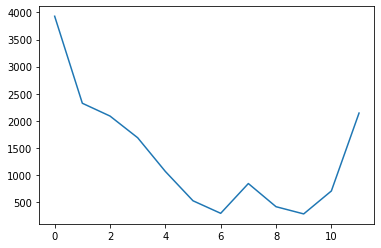

In [109]:
plt.plot(Data_group_count_seasonal_17['pCO2'])

In [ ]:
Color_per_biomes = ['fuchsia','cyan','palegreen','mediumseagreen','darkgreen','limegreen','orange','orangered','darkred']


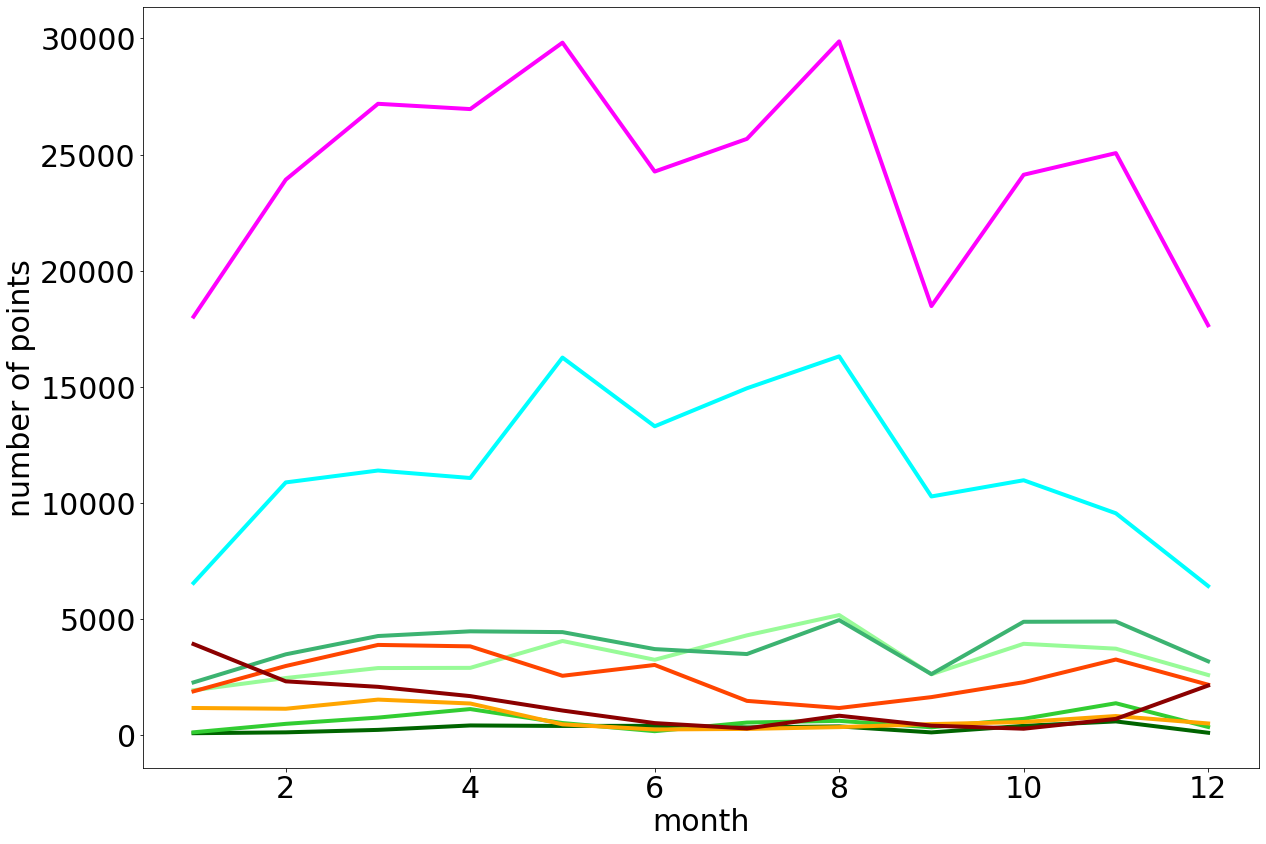

In [119]:
plt.figure(figsize=[20. , 14.])
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_0['pCO2'].values,'fuchsia',linewidth=4,label='all biomes')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_9['pCO2'].values,'cyan',linewidth=4,label='biome 9')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_10['pCO2'].values,'palegreen',linewidth=4,label='biome 10')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_11['pCO2'].values,'mediumseagreen',linewidth=4,label='biome 11')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_12['pCO2'].values,'darkgreen',linewidth=4,label='biome 12')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_13['pCO2'].values,'limegreen',linewidth=4,label='biome 13')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_15['pCO2'].values,'orange',linewidth=4,label='biome 15')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_16['pCO2'].values,'orangered',linewidth=4,label='biome 16')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_17['pCO2'].values,'darkred',linewidth=4,label='biome 17')
locsX,labelsx = plt.xticks(size=30)
plt.xlabel('month',fontsize=30)
plt.ylabel('number of points',fontsize=30)
locsY,labelsy = plt.yticks(size=30)    
#plt.legend(loc='upper left',fontsize='xx-large')
plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/Seasonal_Obs_Distr.png')
#plt.close()

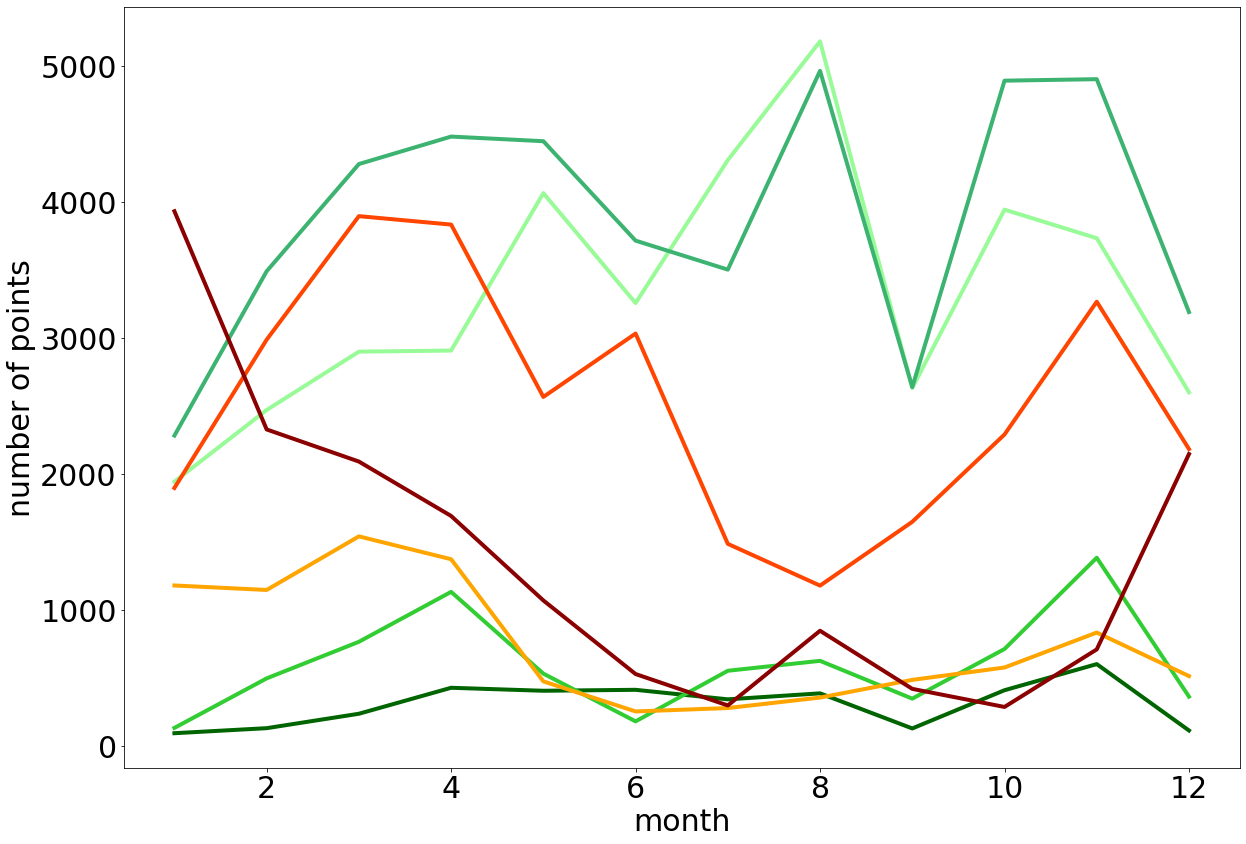

In [125]:
plt.figure(figsize=[20. , 14.])
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_10['pCO2'].values,'palegreen',linewidth=4,label='biome 10')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_11['pCO2'].values,'mediumseagreen',linewidth=4,label='biome 11')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_12['pCO2'].values,'darkgreen',linewidth=4,label='biome 12')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_13['pCO2'].values,'limegreen',linewidth=4,label='biome 13')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_15['pCO2'].values,'orange',linewidth=4,label='biome 15')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_16['pCO2'].values,'orangered',linewidth=4,label='biome 16')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_17['pCO2'].values,'darkred',linewidth=4,label='biome 17')
locsX,labelsx = plt.xticks(size=30)
plt.xlabel('month',fontsize=30)
plt.ylabel('number of points',fontsize=30)
locsY,labelsy = plt.yticks(size=30)    
#plt.legend(loc='upper left',fontsize='xx-large')
plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/Seasonal_Obs_Distr_zoom.png')
#plt.close()

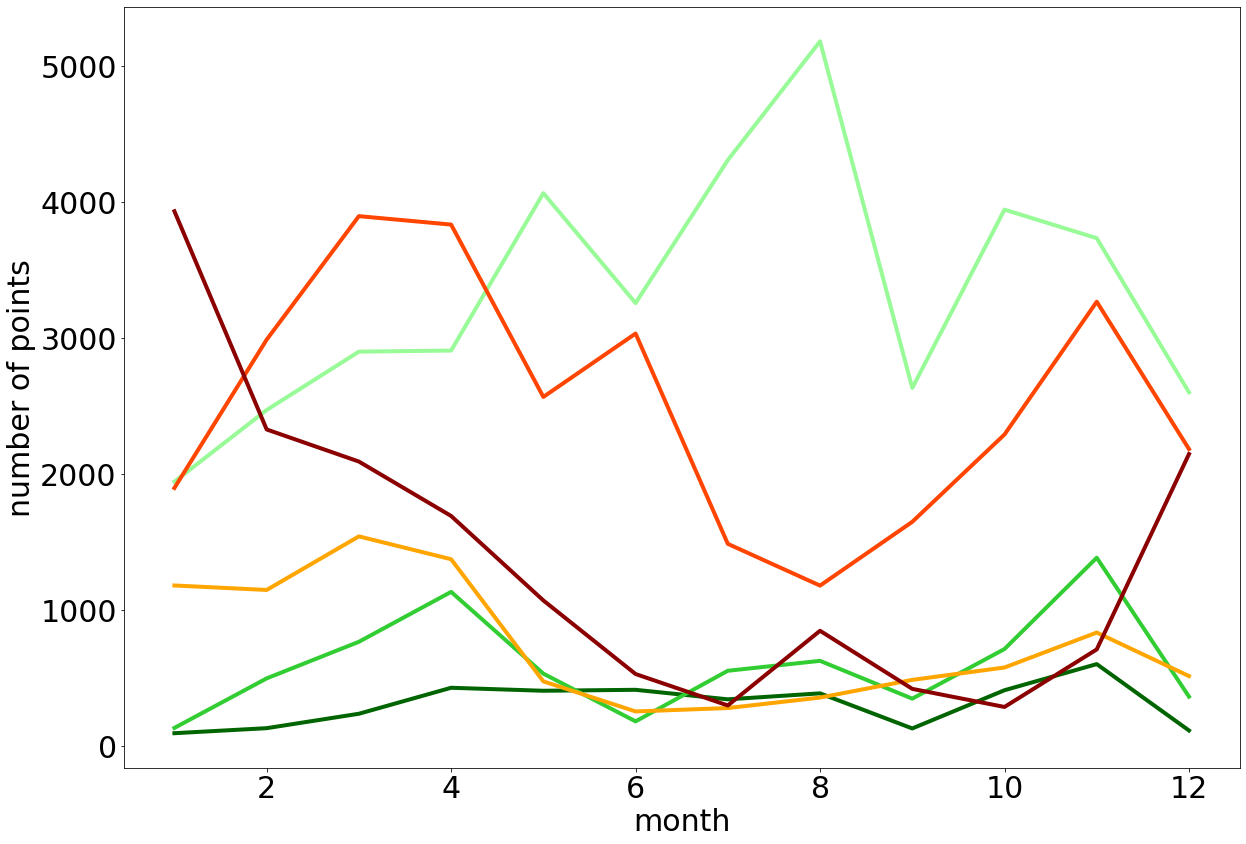

In [126]:
plt.figure(figsize=[20. , 14.])
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_10['pCO2'].values,'palegreen',linewidth=4,label='biome 10')
#plt.plot(np.arange(1,13,1),Data_group_count_seasonal_11['pCO2'].values,'mediumseagreen',linewidth=4,label='biome 11')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_12['pCO2'].values,'darkgreen',linewidth=4,label='biome 12')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_13['pCO2'].values,'limegreen',linewidth=4,label='biome 13')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_15['pCO2'].values,'orange',linewidth=4,label='biome 15')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_16['pCO2'].values,'orangered',linewidth=4,label='biome 16')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_17['pCO2'].values,'darkred',linewidth=4,label='biome 17')
locsX,labelsx = plt.xticks(size=30)
plt.xlabel('month',fontsize=30)
plt.ylabel('number of points',fontsize=30)
locsY,labelsy = plt.yticks(size=30)    
#plt.legend(loc='upper left',fontsize='xx-large')
#plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/Seasonal_Obs_Distr_zoom.png')
#plt.close()

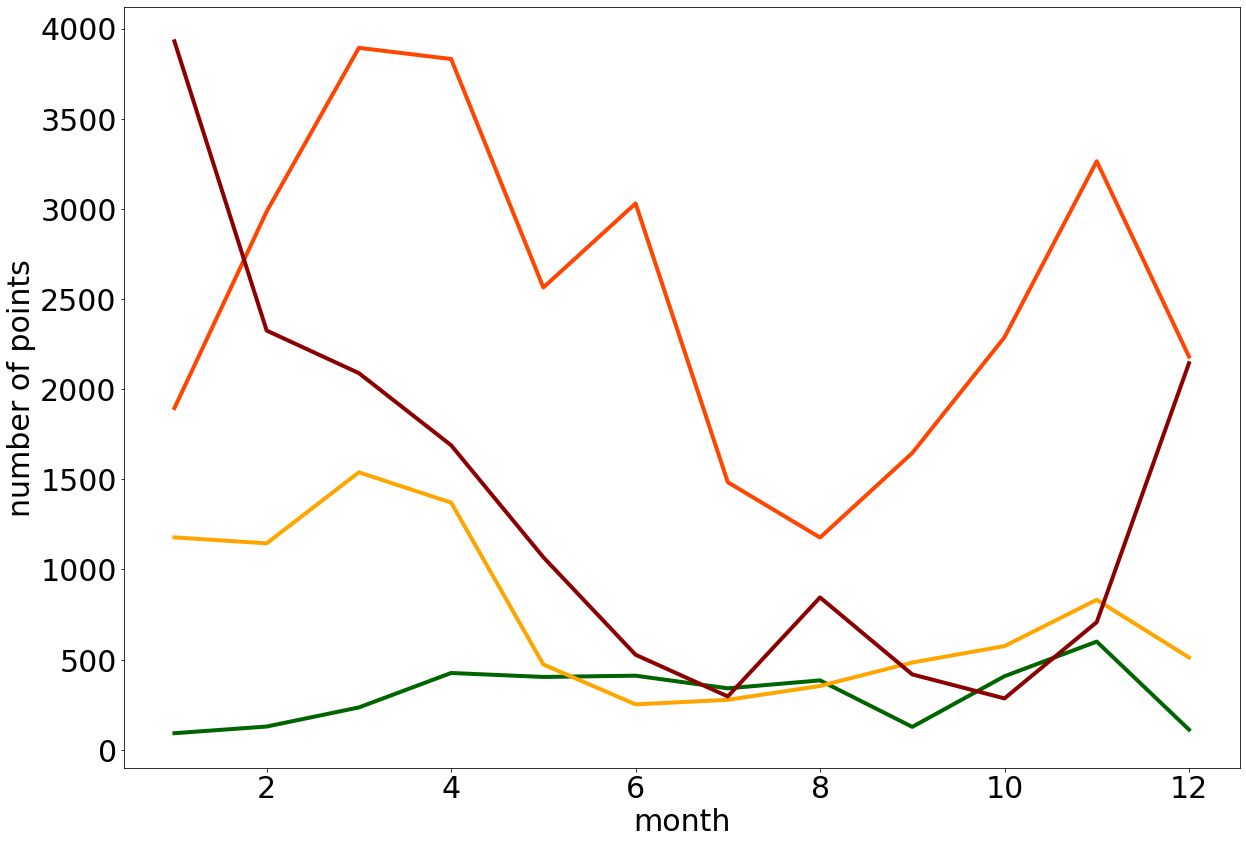

In [128]:
plt.figure(figsize=[20. , 14.])
#plt.plot(np.arange(1,13,1),Data_group_count_seasonal_10['pCO2'].values,'palegreen',linewidth=4,label='biome 10')
#plt.plot(np.arange(1,13,1),Data_group_count_seasonal_11['pCO2'].values,'mediumseagreen',linewidth=4,label='biome 11')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_12['pCO2'].values,'darkgreen',linewidth=4,label='biome 12')
#plt.plot(np.arange(1,13,1),Data_group_count_seasonal_13['pCO2'].values,'limegreen',linewidth=4,label='biome 13')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_15['pCO2'].values,'orange',linewidth=4,label='biome 15')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_16['pCO2'].values,'orangered',linewidth=4,label='biome 16')
plt.plot(np.arange(1,13,1),Data_group_count_seasonal_17['pCO2'].values,'darkred',linewidth=4,label='biome 17')
locsX,labelsx = plt.xticks(size=30)
plt.xlabel('month',fontsize=30)
plt.ylabel('number of points',fontsize=30)
locsY,labelsy = plt.yticks(size=30)    
#plt.legend(loc='upper left',fontsize='xx-large')
#plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/Seasonal_Obs_Distr_zoom.png')
#plt.close()

In [122]:
Data_group_count_seasonal_11['pCO2'].values.mean()

3896.0833333333335

In [123]:
Data_group_count_seasonal_13['pCO2'].values.mean()

600.4166666666666

In [28]:
day2.shape, Biome_region_02.shape, lat2.shape

((26374,), (9, 180), (180, 360))

In [8]:
distribution = Data_all.groupby('coordinates')
lat_new = distribution['lat'].agg(np.max).values
lon_new = distribution['lon'].agg(np.max).values

In [9]:
group1 = Data_all.groupby('coordinates').pCO2.apply(list).reset_index()

In [10]:
pCO2_number = np.ones(68454)
pCO2_number = pCO2_number * np.nan
for i in np.arange(0,68454,1):
    pCO2_number[i] = len(group1.pCO2[i])

In [11]:
pCO2_number

array([3., 3., 2., ..., 1., 2., 2.])

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


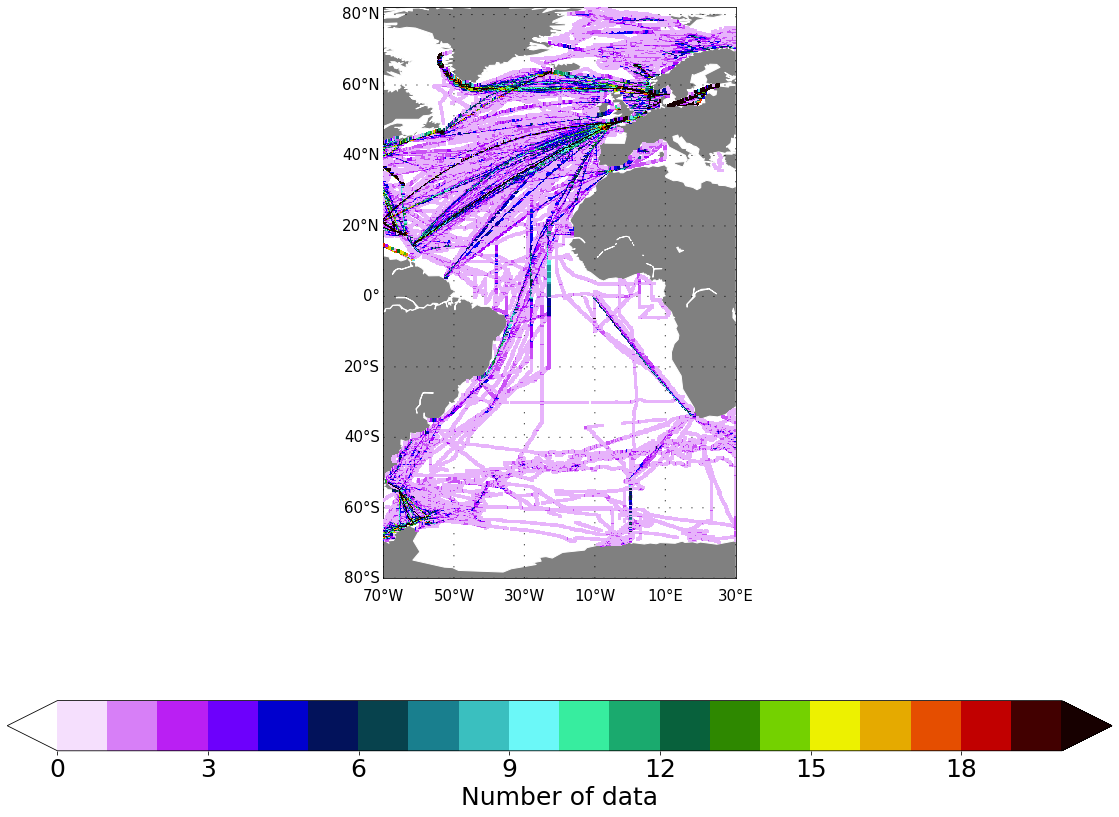

In [16]:
lat_test = np.arange(-89.5,90.5,1)
lon_test = np.arange(-179.5, 180.5,1)
lon2, lat2 = np.meshgrid(lon_test,lat_test)

plt.figure(figsize=[20. , 15.],facecolor='w')
limits=[0.,20.]
m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=90,\
llcrnrlon=-70,urcrnrlon=30)
m.drawcoastlines(color='white')
m.fillcontinents(color='grey',lake_color='white',zorder = 0)
parallels = np.arange(-80.,81,20.)
m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
pal = gen_pal_Testu()
contours = np.arange(0.,21.,1.)
C1 = m.contourf(lon2,lat2,np.ones((len(lat_test),len(lon_test)))*np.nan,contours,cmap=pal,norm=norm,extend='both')
cbar = plt.colorbar(C1,orientation='horizontal',shrink=0.99)
plt.clim(limits[0],limits[1])
cbar.set_label('Number of data',fontsize=25)
cbar.ax.tick_params(labelsize=25)
plt.scatter(lon_new, lat_new, marker='s', c=pCO2_number, vmin=0., vmax=20., s=10, zorder=10,edgecolor='None',cmap=pal)
locs, labels = plt.xticks(size = 35)
locsY,labelsy = plt.yticks(size = 35)
plt.ylim(-80.,82.)
plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/Figure1a.png')

In [17]:
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_01.nc"
lat1_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_01.nc"
lon1_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_01.nc"
pCO2_list1_M = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_02.nc"
lat2_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_02.nc"
lon2_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_02.nc"
pCO2_list2_M = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_03.nc"
lat3_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_03.nc"
lon3_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_03.nc"
pCO2_list3_M = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_04.nc"
lat4_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_04.nc"
lon4_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_04.nc"
pCO2_list4_M = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_05.nc"
lat5_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_05.nc"
lon5_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_05.nc"
pCO2_list5_M = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_06.nc"
lat6_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_06.nc"
lon6_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_06.nc"
pCO2_list6_M = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_07.nc"
lat7_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_07.nc"
lon7_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_07.nc"
pCO2_list7_M = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_08.nc"
lat8_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_08.nc"
lon8_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_08.nc"
pCO2_list8_M = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_09.nc"
lat9_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_09.nc"
lon9_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_09.nc"
pCO2_list9_M = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_10.nc"
lat10_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_10.nc"
lon10_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_10.nc"
pCO2_list10_M = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_11.nc"
lat11_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_11.nc"
lon11_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_11.nc"
pCO2_list11_M = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lat_12.nc"
lat12_M = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_lon_12.nc"
lon12_M = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Mooring_NEMO_SOCAT_train_nc/Data_training_pCO2_12.nc"
pCO2_list12_M = readnc_1d(direct,'pCO2_list')

In [18]:
lat_comp1_M = np.concatenate((lat1_M,lat2_M,lat3_M,lat4_M,lat5_M,lat6_M,lat7_M,lat8_M,lat9_M,lat10_M,lat11_M,lat12_M),axis =0)
lon_comp1_M = np.concatenate((lon1_M,lon2_M,lon3_M,lon4_M,lon5_M,lon6_M,lon7_M,lon8_M,lon9_M,lon10_M,lon11_M,lon12_M),axis =0)
pCO2_list_comp1_M = np.concatenate((pCO2_list1_M,pCO2_list2_M,pCO2_list3_M,pCO2_list4_M,pCO2_list5_M,pCO2_list6_M,pCO2_list7_M,pCO2_list8_M,pCO2_list9_M,pCO2_list10_M,pCO2_list11_M,pCO2_list12_M),axis =0)


In [19]:
Data_all_M = pd.DataFrame({'pCO2': pCO2_list_comp1_M, 'lon': lon_comp1_M, 'lat': lat_comp1_M}, columns=['pCO2','lon','lat'])
Data_all_M['coordinates'] = list(zip(Data_all_M.lat, Data_all_M.lon))

In [20]:
distribution_M = Data_all_M.groupby('coordinates')
lat_new_M = distribution_M['lat'].agg(np.max).values
lon_new_M = distribution_M['lon'].agg(np.max).values

In [21]:
group1_M = Data_all_M.groupby('coordinates').pCO2.apply(list).reset_index()

In [22]:
pCO2_number_M = np.ones(117)
pCO2_number_M = pCO2_number_M * np.nan
for i in np.arange(0,117,1):
    pCO2_number_M[i] = len(group1_M.pCO2[i])

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


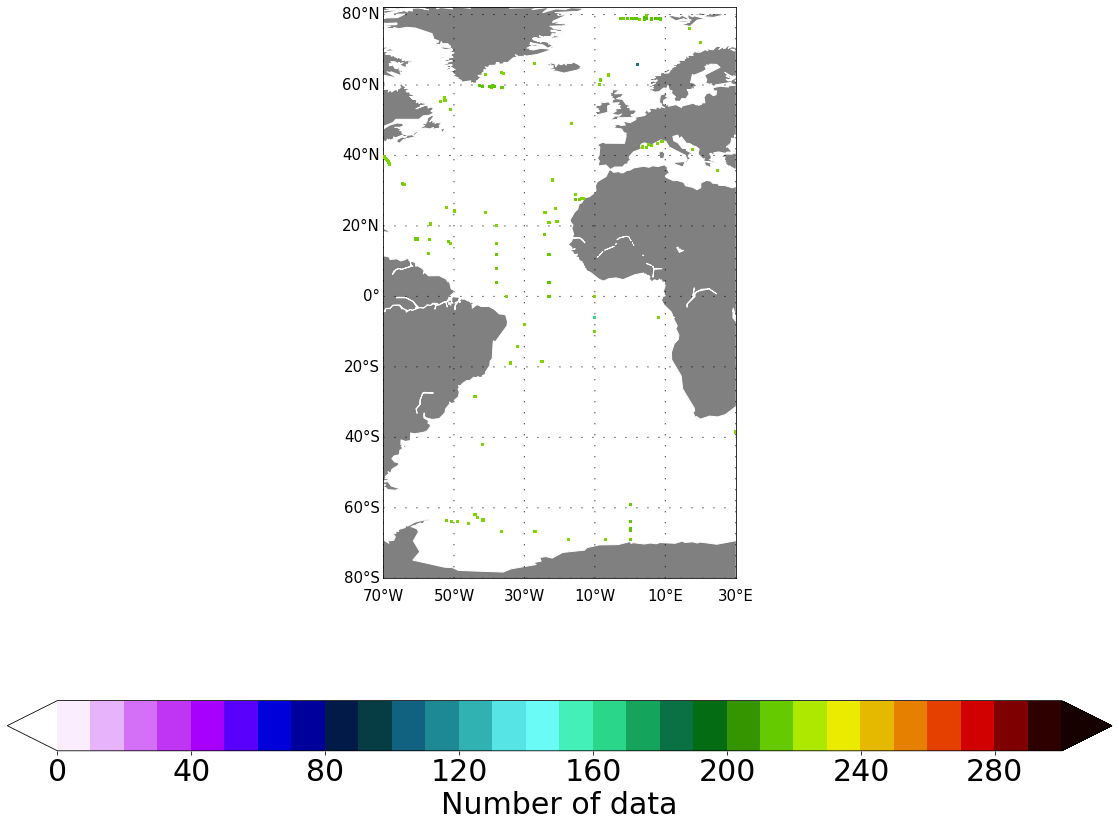

In [23]:
plt.figure(figsize=[20. , 15.],facecolor='w')
limits=[0.,300.]
m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=90,\
llcrnrlon=-70,urcrnrlon=30)
m.drawcoastlines(color='white')
m.fillcontinents(color='grey',lake_color='white',zorder = 0)
parallels = np.arange(-80.,81,20.)
m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
pal = gen_pal_Testu()
contours = np.arange(0.,310.,10.)
C1 = m.contourf(lon2,lat2,np.ones((len(lat_test),len(lon_test)))*np.nan,contours,cmap=pal,norm=norm,extend='both')
cbar = plt.colorbar(C1,orientation='horizontal',shrink=0.99)
plt.clim(limits[0],limits[1])
cbar.set_label('Number of data',fontsize=30)
cbar.ax.tick_params(labelsize=30)
plt.scatter(lon_new_M, lat_new_M, marker='s', c=pCO2_number_M, vmin=0., vmax=300., s=10, zorder=10,edgecolor='None',cmap=pal)
locs, labels = plt.xticks(size = 35)
locsY,labelsy = plt.yticks(size = 35)
plt.ylim(-80.,82.)
plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/Mooring_distrib.png')

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


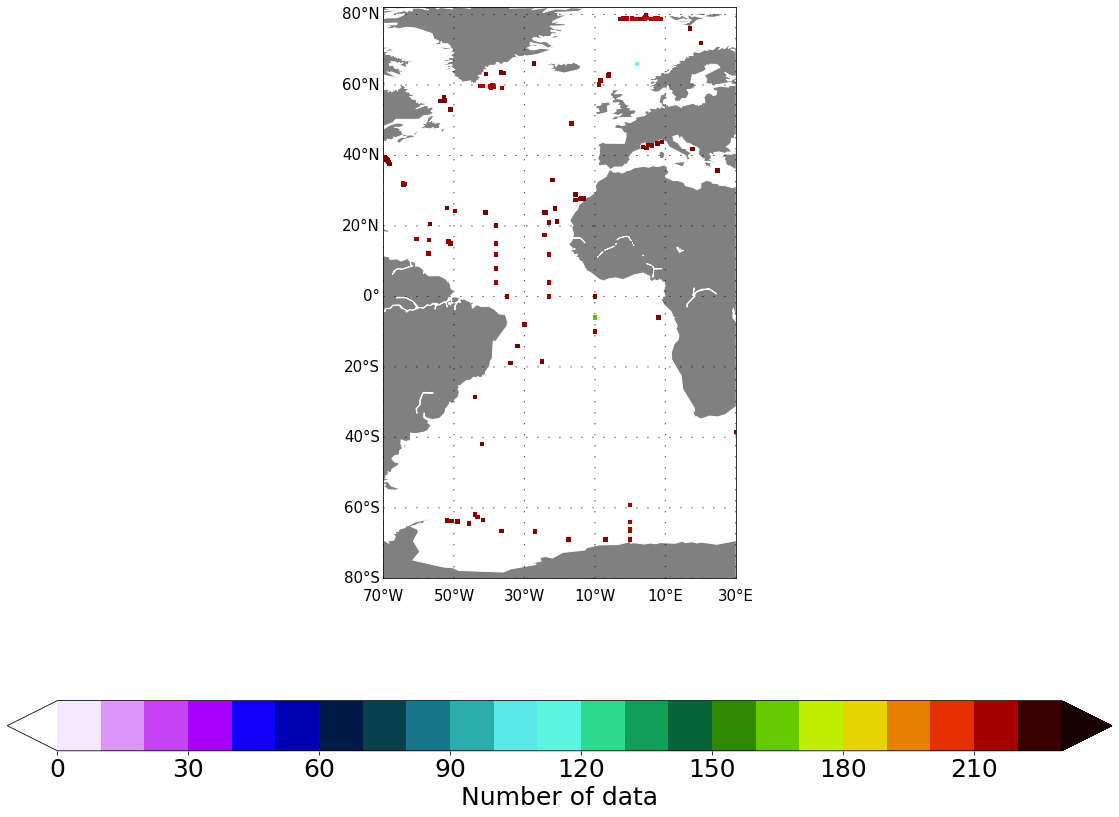

In [24]:
plt.figure(figsize=[20. , 15.],facecolor='w')
limits=[0.,230.]
m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=90,\
llcrnrlon=-70,urcrnrlon=30)
m.drawcoastlines(color='white')
m.fillcontinents(color='grey',lake_color='white',zorder = 0)
norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
parallels = np.arange(-80.,81,20.)
m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
pal = gen_pal_Testu()
contours = np.arange(0.,240.,10.)
C1 = m.contourf(lon2,lat2,np.ones((len(lat_test),len(lon_test)))*np.nan,contours,cmap=pal,norm=norm,extend='both')
cbar = plt.colorbar(C1,orientation='horizontal',shrink=0.99)
plt.clim(limits[0],limits[1])
cbar.set_label('Number of data',fontsize=25)
cbar.ax.tick_params(labelsize=25)
#plt.scatter(lon_new, lat_new, marker='s', c=pCO2_number, vmin=0., vmax=230., s=10, zorder=10,edgecolor='None',cmap=pal)
plt.scatter(lon_new_M, lat_new_M, marker='s', c=pCO2_number_M, vmin=0., vmax=230., s=20, zorder=20,edgecolor='None',cmap=pal)
locs, labels = plt.xticks(size = 35)
locsY,labelsy = plt.yticks(size = 35)
plt.ylim(-80.,82.)
plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/Figure1c_new.png')

In [25]:
direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_20082010_nc/Data_training_lat_2008.nc"
lat1_A = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_20082010_nc/Data_training_lon_2008.nc"
lon1_A = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_20082010_nc/Data_training_pCO2_2008.nc"
pCO2_list1_A = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_20082010_nc/Data_training_lat_2009.nc"
lat2_A = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_20082010_nc/Data_training_lon_2009.nc"
lon2_A = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_20082010_nc/Data_training_pCO2_2009.nc"
pCO2_list2_A = readnc_1d(direct,'pCO2_list')

direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_20082010_nc/Data_training_lat_2010.nc"
lat3_A = readnc_1d(direct,'lat_list')
direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_20082010_nc/Data_training_lon_2010.nc"
lon3_A = readnc_1d(direct,'lon_list')
direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_20082010_nc/Data_training_pCO2_2010.nc"
pCO2_list3_A = readnc_1d(direct,'pCO2_list')

In [26]:
lat_comp_A = np.concatenate((lat1_A,lat2_A,lat3_A),axis =0)
lon_comp_A = np.concatenate((lon1_A,lon2_A,lon3_A),axis =0)
pCO2_list_comp_A = np.concatenate((pCO2_list1_A,pCO2_list2_A,pCO2_list3_A),axis =0)

In [27]:
Data_all_A = pd.DataFrame({'pCO2': pCO2_list_comp_A, 'lon': lon_comp_A, 'lat': lat_comp_A}, columns=['pCO2','lon','lat'])
Data_all_A['coordinates'] = list(zip(Data_all_A.lat, Data_all_A.lon))

In [28]:
distribution_A = Data_all_A.groupby('coordinates')
lat_new_A = distribution_A['lat'].agg(np.max).values
lon_new_A = distribution_A['lon'].agg(np.max).values

In [29]:
group1_A = Data_all_A.groupby('coordinates').pCO2.apply(list).reset_index()

In [30]:
pCO2_number_A = np.ones(54102)
pCO2_number_A = pCO2_number_A * np.nan
for i in np.arange(0,54102,1):
    pCO2_number_A[i] = len(group1_A.pCO2[i])

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


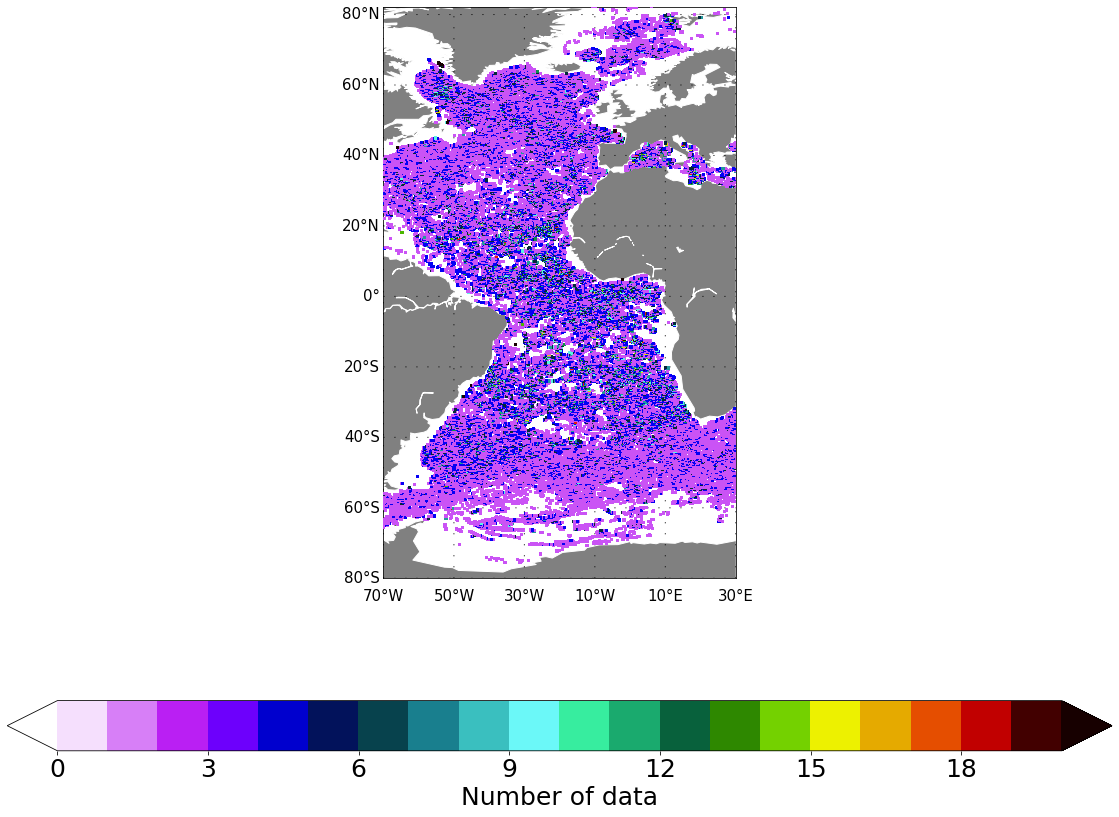

In [32]:
plt.figure(figsize=[20. , 15.],facecolor='w')
limits=[0.,20.]
m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=90,\
llcrnrlon=-70,urcrnrlon=30)
m.drawcoastlines(color='white')
m.fillcontinents(color='grey',lake_color='white',zorder = 0)
parallels = np.arange(-80.,81,20.)
m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
pal = gen_pal_Testu()
contours = np.arange(0.,21.,1.)
C1 = m.contourf(lon2,lat2,np.ones((len(lat_test),len(lon_test)))*np.nan,contours,cmap=pal,norm=norm,extend='both')
cbar = plt.colorbar(C1,orientation='horizontal',shrink=0.99)
plt.clim(limits[0],limits[1])
cbar.set_label('Number of data',fontsize=25)
cbar.ax.tick_params(labelsize=25)
plt.scatter(lon_new_A, lat_new_A, marker='s', c=pCO2_number_A, vmin=0., vmax=10., s=10, zorder=10,edgecolor='None',cmap=pal)
locs, labels = plt.xticks(size = 35)
locsY,labelsy = plt.yticks(size = 35)
plt.ylim(-80.,82.)
plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/Figure1b.png')

In [31]:
for time_year in np.arange(2008,2011,1):
    for month in np.arange(1,13,1):
        if month < 10:
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_lat_"+str(time_year)+"_0"+str(month)+".nc"
            lat_A251 = readnc_1d(direct,'lat_list')
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_lon_"+str(time_year)+"_0"+str(month)+".nc"        
            lon_A251 = readnc_1d(direct,'lon_list')
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_pCO2_"+str(time_year)+"_0"+str(month)+".nc"
            pCO2_list_A251 = readnc_1d(direct,'pCO2_list')
        else:
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_lat_"+str(time_year)+"_"+str(month)+".nc"
            lat_A251 = readnc_1d(direct,'lat_list')
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_lon_"+str(time_year)+"_"+str(month)+".nc"        
            lon_A251 = readnc_1d(direct,'lon_list')
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_pCO2_"+str(time_year)+"_"+str(month)+".nc"
            pCO2_list_A251 = readnc_1d(direct,'pCO2_list')

        if time_year == 2008 and month == 1:
            lat_A25 = copy.copy(lat_A251)
            lon_A25 = copy.copy(lon_A251)
            pCO2_list_A25 = copy.copy(pCO2_list_A251)
        else:
            lat_A25 = np.concatenate((lat_A25,lat_A251),axis =0)
            lon_A25 = np.concatenate((lon_A25,lon_A251),axis =0)
            pCO2_list_A25 = np.concatenate((pCO2_list_A25,pCO2_list_A251),axis =0)

In [32]:
Data_all_A25 = pd.DataFrame({'pCO2': pCO2_list_A25, 'lon': lon_A25, 'lat': lat_A25}, columns=['pCO2','lon','lat'])
Data_all_A25['coordinates'] = list(zip(Data_all_A25.lat, Data_all_A25.lon))

In [33]:
distribution_A25 = Data_all_A25.groupby('coordinates')
lat_new_A25 = distribution_A25['lat'].agg(np.max).values
lon_new_A25 = distribution_A25['lon'].agg(np.max).values

In [34]:
group1_A25 = Data_all_A25.groupby('coordinates').pCO2.apply(list).reset_index()

In [35]:
pCO2_number_A25 = np.ones(18884)
pCO2_number_A25 = pCO2_number_A25 * np.nan
for i in np.arange(0,18884,1):
    pCO2_number_A25[i] = len(group1_A25.pCO2[i])

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


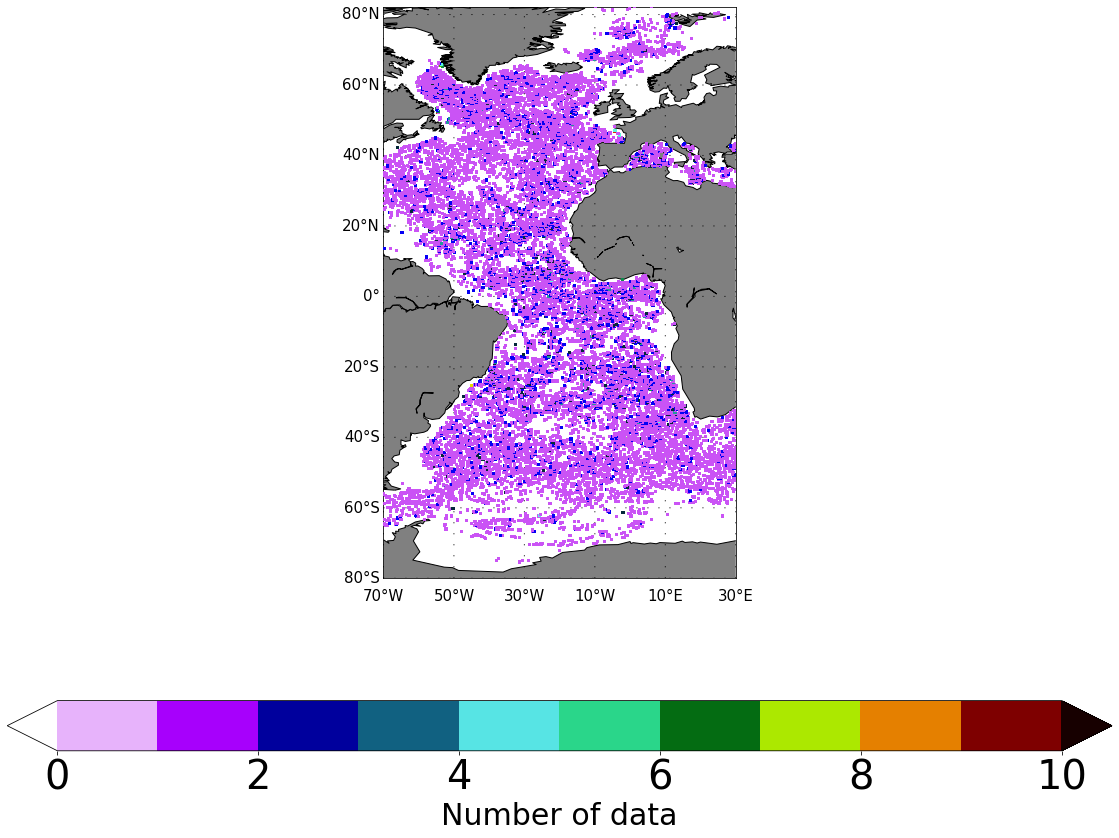

In [36]:
plt.figure(figsize=[20. , 15.],facecolor='w')
limits=[0.,10.]
m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=90,\
llcrnrlon=-70,urcrnrlon=30)
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='white',zorder = 0)
parallels = np.arange(-80.,81,20.)
m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
pal = gen_pal_Testu()
contours = np.arange(0.,11.,1.)
C1 = m.contourf(lon2,lat2,np.ones((len(lat_test),len(lon_test)))*np.nan,contours,cmap=pal,norm=norm,extend='both')
cbar = plt.colorbar(C1,orientation='horizontal',shrink=0.99)
plt.clim(limits[0],limits[1])
cbar.set_label('Number of data',fontsize=30)
cbar.ax.tick_params(labelsize=40)
plt.scatter(lon_new_A25, lat_new_A25, marker='s', c=pCO2_number_A25, vmin=0., vmax=10., s=10, zorder=10,edgecolor='None',cmap=pal)
locs, labels = plt.xticks(size = 30)
locsY,labelsy = plt.yticks(size = 30)
plt.ylim(-80.,82.)
plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/FigureS1a.png')

In [37]:
for time_year in np.arange(2008,2011,1):
    for month in np.arange(1,13,1):
        if month < 10:
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc10/Data_training_lat_"+str(time_year)+"_0"+str(month)+".nc"
            lat_A101 = readnc_1d(direct,'lat_list')
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc10/Data_training_lon_"+str(time_year)+"_0"+str(month)+".nc"        
            lon_A101 = readnc_1d(direct,'lon_list')
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc10/Data_training_pCO2_"+str(time_year)+"_0"+str(month)+".nc"
            pCO2_list_A101 = readnc_1d(direct,'pCO2_list')
        else:
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc10/Data_training_lat_"+str(time_year)+"_"+str(month)+".nc"
            lat_A101 = readnc_1d(direct,'lat_list')
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc10/Data_training_lon_"+str(time_year)+"_"+str(month)+".nc"        
            lon_A101 = readnc_1d(direct,'lon_list')
            direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc10/Data_training_pCO2_"+str(time_year)+"_"+str(month)+".nc"
            pCO2_list_A101 = readnc_1d(direct,'pCO2_list')

        if time_year == 2008 and month == 1:
            lat_A10 = copy.copy(lat_A101)
            lon_A10 = copy.copy(lon_A101)
            pCO2_list_A10 = copy.copy(pCO2_list_A101)
        else:
            lat_A10 = np.concatenate((lat_A10,lat_A101),axis =0)
            lon_A10 = np.concatenate((lon_A10,lon_A101),axis =0)
            pCO2_list_A10 = np.concatenate((pCO2_list_A10,pCO2_list_A101),axis =0)

In [38]:
Data_all_A10 = pd.DataFrame({'pCO2': pCO2_list_A10, 'lon': lon_A10, 'lat': lat_A10}, columns=['pCO2','lon','lat'])
Data_all_A10['coordinates'] = list(zip(Data_all_A10.lat, Data_all_A10.lon))

In [39]:
distribution_A10 = Data_all_A10.groupby('coordinates')
lat_new_A10 = distribution_A10['lat'].agg(np.max).values
lon_new_A10 = distribution_A10['lon'].agg(np.max).values

In [40]:
group1_A10 = Data_all_A10.groupby('coordinates').pCO2.apply(list).reset_index()

In [41]:
group1_A10.size/2

8265.0

In [42]:
pCO2_number_A10 = np.ones(8265)
pCO2_number_A10 = pCO2_number_A10 * np.nan
for i in np.arange(0,8265,1):
    pCO2_number_A10[i] = len(group1_A10.pCO2[i])

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


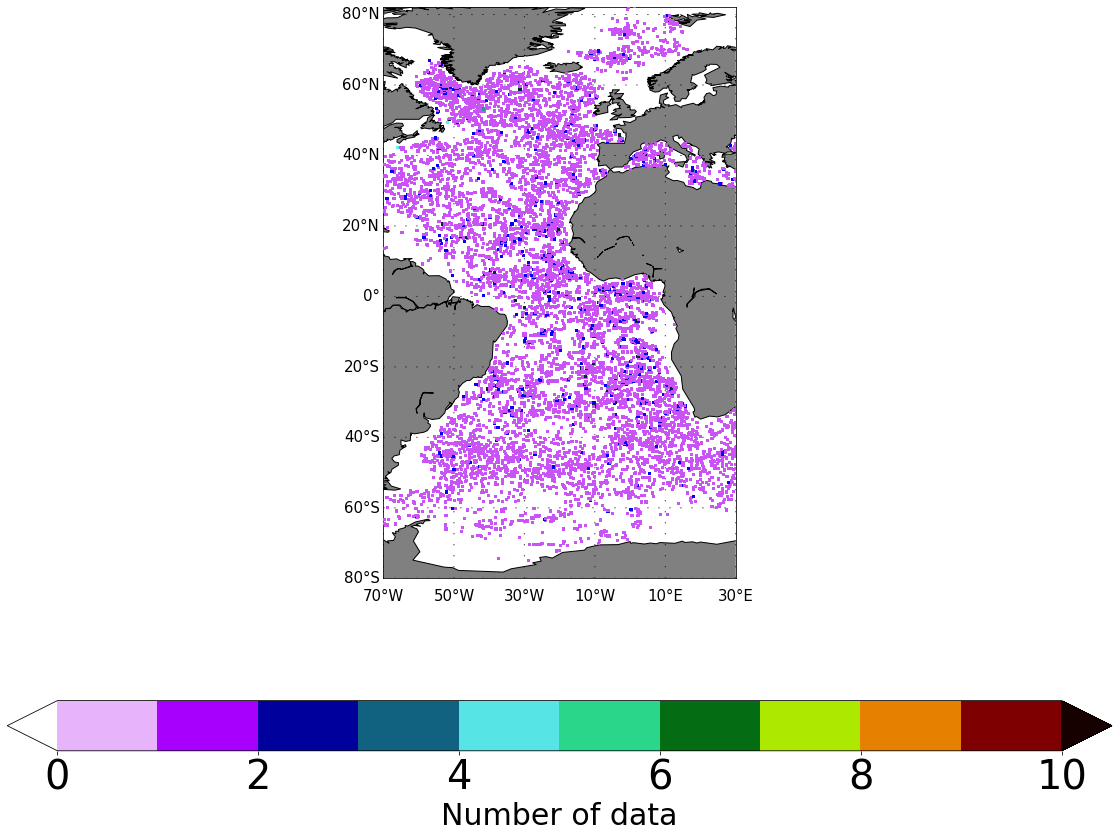

In [43]:
plt.figure(figsize=[20. , 15.],facecolor='w')
limits=[0.,10.]
m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=90,\
llcrnrlon=-70,urcrnrlon=30)
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='white',zorder = 0)
parallels = np.arange(-80.,81,20.)
m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
pal = gen_pal_Testu()
contours = np.arange(0.,11.,1.)
C1 = m.contourf(lon2,lat2,np.ones((len(lat_test),len(lon_test)))*np.nan,contours,cmap=pal,norm=norm,extend='both')
cbar = plt.colorbar(C1,orientation='horizontal',shrink=0.99)
plt.clim(limits[0],limits[1])
cbar.set_label('Number of data',fontsize=30)
cbar.ax.tick_params(labelsize=40)
plt.scatter(lon_new_A10, lat_new_A10, marker='s', c=pCO2_number_A10, vmin=0., vmax=10., s=10, zorder=10,edgecolor='None',cmap=pal)
locs, labels = plt.xticks(size = 30)
locsY,labelsy = plt.yticks(size = 30)
plt.ylim(-80.,82.)
plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/FigureS1b.png')

In [44]:
for time_year in np.arange(2008,2011,1):
    direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_lat_"+str(time_year)+"_01.nc"
    lat_A251 = readnc_1d(direct,'lat_list')
    direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_lon_"+str(time_year)+"_01.nc"        
    lon_A251 = readnc_1d(direct,'lon_list')
    direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_pCO2_"+str(time_year)+"_01.nc"
    pCO2_list_A251 = readnc_1d(direct,'pCO2_list')

    if time_year == 2008:
        lat_A25_J = copy.copy(lat_A251)
        lon_A25_J = copy.copy(lon_A251)
        pCO2_list_A25_J = copy.copy(pCO2_list_A251)
    else:
        lat_A25_J = np.concatenate((lat_A25_J,lat_A251),axis =0)
        lon_A25_J = np.concatenate((lon_A25_J,lon_A251),axis =0)
        pCO2_list_A25_J = np.concatenate((pCO2_list_A25_J,pCO2_list_A251),axis =0)

In [45]:
Data_all_A25_J = pd.DataFrame({'pCO2': pCO2_list_A25_J, 'lon': lon_A25_J, 'lat': lat_A25_J}, columns=['pCO2','lon','lat'])
Data_all_A25_J['coordinates'] = list(zip(Data_all_A25_J.lat, Data_all_A25_J.lon))

In [46]:
distribution_A25_J = Data_all_A25_J.groupby('coordinates')
lat_new_A25_J = distribution_A25_J['lat'].agg(np.max).values
lon_new_A25_J = distribution_A25_J['lon'].agg(np.max).values

In [47]:
group1_A25_J = Data_all_A25_J.groupby('coordinates').pCO2.apply(list).reset_index()

In [48]:
group1_A25_J.size/2

1779.0

In [49]:
pCO2_number_A25_J = np.ones(int(group1_A25_J.size/2))
pCO2_number_A25_J = pCO2_number_A25_J * np.nan
for i in np.arange(0,int(group1_A25_J.size/2),1):
    pCO2_number_A25_J[i] = len(group1_A25_J.pCO2[i])

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


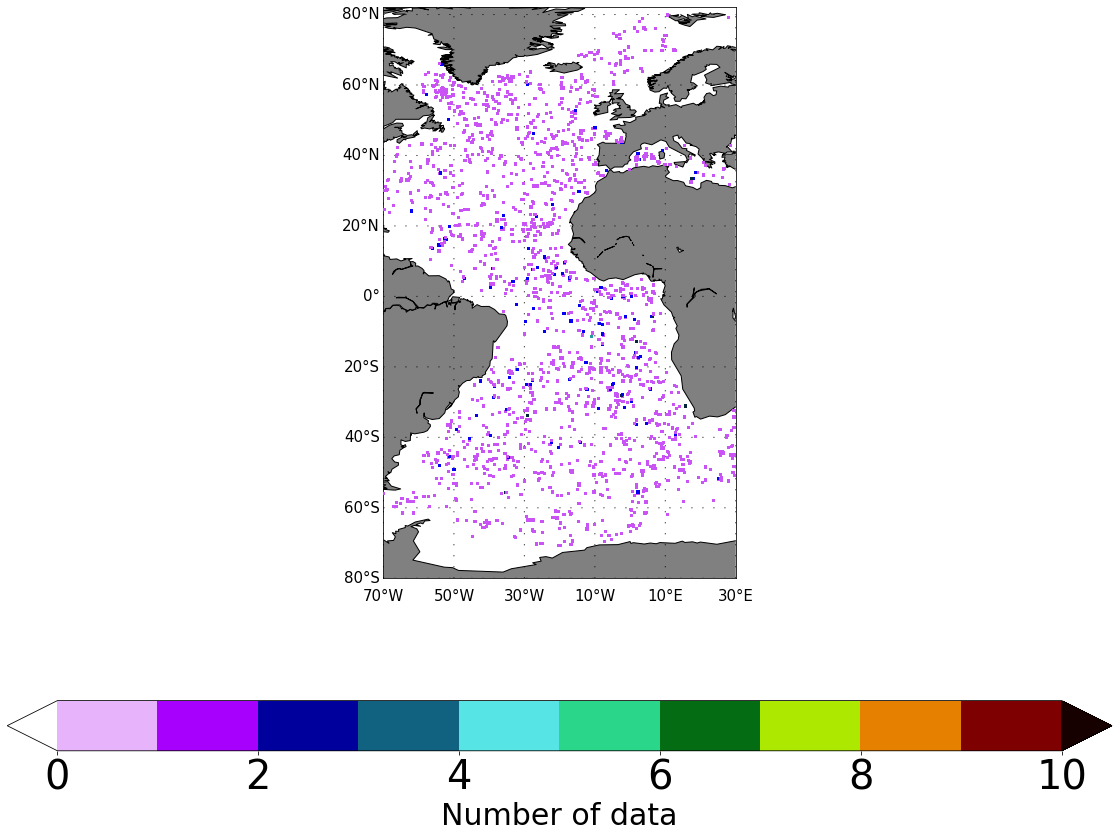

In [50]:
plt.figure(figsize=[20. , 15.],facecolor='w')
limits=[0.,10.]
m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=90,\
llcrnrlon=-70,urcrnrlon=30)
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='white',zorder = 0)
parallels = np.arange(-80.,81,20.)
m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
pal = gen_pal_Testu()
contours = np.arange(0.,11.,1.)
C1 = m.contourf(lon2,lat2,np.ones((len(lat_test),len(lon_test)))*np.nan,contours,cmap=pal,norm=norm,extend='both')
cbar = plt.colorbar(C1,orientation='horizontal',shrink=0.99)
plt.clim(limits[0],limits[1])
cbar.set_label('Number of data',fontsize=30)
cbar.ax.tick_params(labelsize=40)
plt.scatter(lon_new_A25_J, lat_new_A25_J, marker='s', c=pCO2_number_A25_J, vmin=0., vmax=10., s=10, zorder=10,edgecolor='None',cmap=pal)
locs, labels = plt.xticks(size = 30)
locsY,labelsy = plt.yticks(size = 30)
plt.ylim(-80.,82.)
plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/FigureS2a.png')

In [51]:
for time_year in np.arange(2008,2011,1):
    direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_lat_"+str(time_year)+"_07.nc"
    lat_A251 = readnc_1d(direct,'lat_list')
    direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_lon_"+str(time_year)+"_07.nc"        
    lon_A251 = readnc_1d(direct,'lon_list')
    direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_pCO2_"+str(time_year)+"_07.nc"
    pCO2_list_A251 = readnc_1d(direct,'pCO2_list')

    if time_year == 2008:
        lat_A25_Ju = copy.copy(lat_A251)
        lon_A25_Ju = copy.copy(lon_A251)
        pCO2_list_A25_Ju = copy.copy(pCO2_list_A251)
    else:
        lat_A25_Ju = np.concatenate((lat_A25_Ju,lat_A251),axis =0)
        lon_A25_Ju = np.concatenate((lon_A25_Ju,lon_A251),axis =0)
        pCO2_list_A25_Ju = np.concatenate((pCO2_list_A25_Ju,pCO2_list_A251),axis =0)

In [52]:
Data_all_A25_Ju = pd.DataFrame({'pCO2': pCO2_list_A25_Ju, 'lon': lon_A25_Ju, 'lat': lat_A25_Ju}, columns=['pCO2','lon','lat'])
Data_all_A25_Ju['coordinates'] = list(zip(Data_all_A25_Ju.lat, Data_all_A25_Ju.lon))

In [53]:
distribution_A25_Ju = Data_all_A25_Ju.groupby('coordinates')
lat_new_A25_Ju = distribution_A25_Ju['lat'].agg(np.max).values
lon_new_A25_Ju = distribution_A25_Ju['lon'].agg(np.max).values

In [54]:
group1_A25_Ju = Data_all_A25_Ju.groupby('coordinates').pCO2.apply(list).reset_index()

In [55]:
group1_A25_Ju.size/2

1754.0

In [56]:
pCO2_number_A25_Ju = np.ones(int(group1_A25_Ju.size/2))
pCO2_number_A25_Ju = pCO2_number_A25_Ju * np.nan
for i in np.arange(0,int(group1_A25_Ju.size/2),1):
    pCO2_number_A25_Ju[i] = len(group1_A25_Ju.pCO2[i])

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


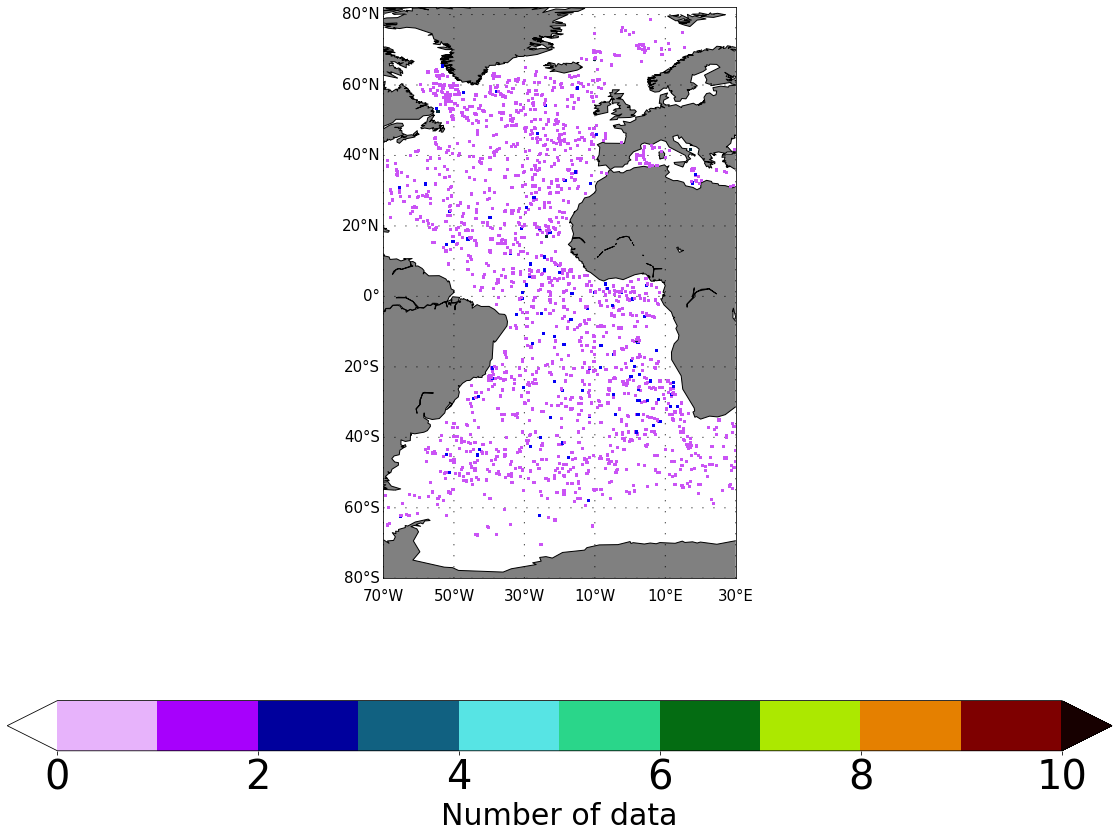

In [57]:
plt.figure(figsize=[20. , 15.],facecolor='w')
limits=[0.,10.]
m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=90,\
llcrnrlon=-70,urcrnrlon=30)
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='white',zorder = 0)
parallels = np.arange(-80.,81,20.)
m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
pal = gen_pal_Testu()
contours = np.arange(0.,11.,1.)
C1 = m.contourf(lon2,lat2,np.ones((len(lat_test),len(lon_test)))*np.nan,contours,cmap=pal,norm=norm,extend='both')
cbar = plt.colorbar(C1,orientation='horizontal',shrink=0.99)
plt.clim(limits[0],limits[1])
cbar.set_label('Number of data',fontsize=30)
cbar.ax.tick_params(labelsize=40)
plt.scatter(lon_new_A25_Ju, lat_new_A25_Ju, marker='s', c=pCO2_number_A25_Ju, vmin=0., vmax=10., s=10, zorder=10,edgecolor='None',cmap=pal)
locs, labels = plt.xticks(size = 30)
locsY,labelsy = plt.yticks(size = 30)
plt.ylim(-80.,82.)
plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/FigureS2b.png')

In [5]:
for time_year in np.arange(2008,2011,1):
    direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_lat_"+str(time_year)+"_11.nc"
    lat_A251 = readnc_1d(direct,'lat_list')
    direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_lon_"+str(time_year)+"_11.nc"        
    lon_A251 = readnc_1d(direct,'lon_list')
    direct = "/Volumes/LaCie/Data/Argo_NEMO_FFNN_Atl_SOCAT_20082010_nc25/Data_training_pCO2_"+str(time_year)+"_11.nc"
    pCO2_list_A251 = readnc_1d(direct,'pCO2_list')

    if time_year == 2008:
        lat_A25_Nov = copy.copy(lat_A251)
        lon_A25_Nov = copy.copy(lon_A251)
        pCO2_list_A25_Nov = copy.copy(pCO2_list_A251)
    else:
        lat_A25_Nov = np.concatenate((lat_A25_Nov,lat_A251),axis =0)
        lon_A25_Nov = np.concatenate((lon_A25_Nov,lon_A251),axis =0)
        pCO2_list_A25_Nov = np.concatenate((pCO2_list_A25_Nov,pCO2_list_A251),axis =0)

In [6]:
Data_all_A25_Nov = pd.DataFrame({'pCO2': pCO2_list_A25_Nov, 'lon': lon_A25_Nov, 'lat': lat_A25_Nov}, columns=['pCO2','lon','lat'])
Data_all_A25_Nov['coordinates'] = list(zip(Data_all_A25_Nov.lat, Data_all_A25_Nov.lon))

In [7]:
distribution_A25_Nov = Data_all_A25_Nov.groupby('coordinates')
lat_new_A25_Nov = distribution_A25_Nov['lat'].agg(np.max).values
lon_new_A25_Nov = distribution_A25_Nov['lon'].agg(np.max).values

In [8]:
group1_A25_Nov = Data_all_A25_Nov.groupby('coordinates').pCO2.apply(list).reset_index()

In [9]:
group1_A25_Nov.size/2

1726.0

In [10]:
pCO2_number_A25_Nov = np.ones(int(group1_A25_Nov.size/2))
pCO2_number_A25_Nov = pCO2_number_A25_Nov * np.nan
for i in np.arange(0,int(group1_A25_Nov.size/2),1):
    pCO2_number_A25_Nov[i] = len(group1_A25_Nov.pCO2[i])

/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/annasommer/opt/miniconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


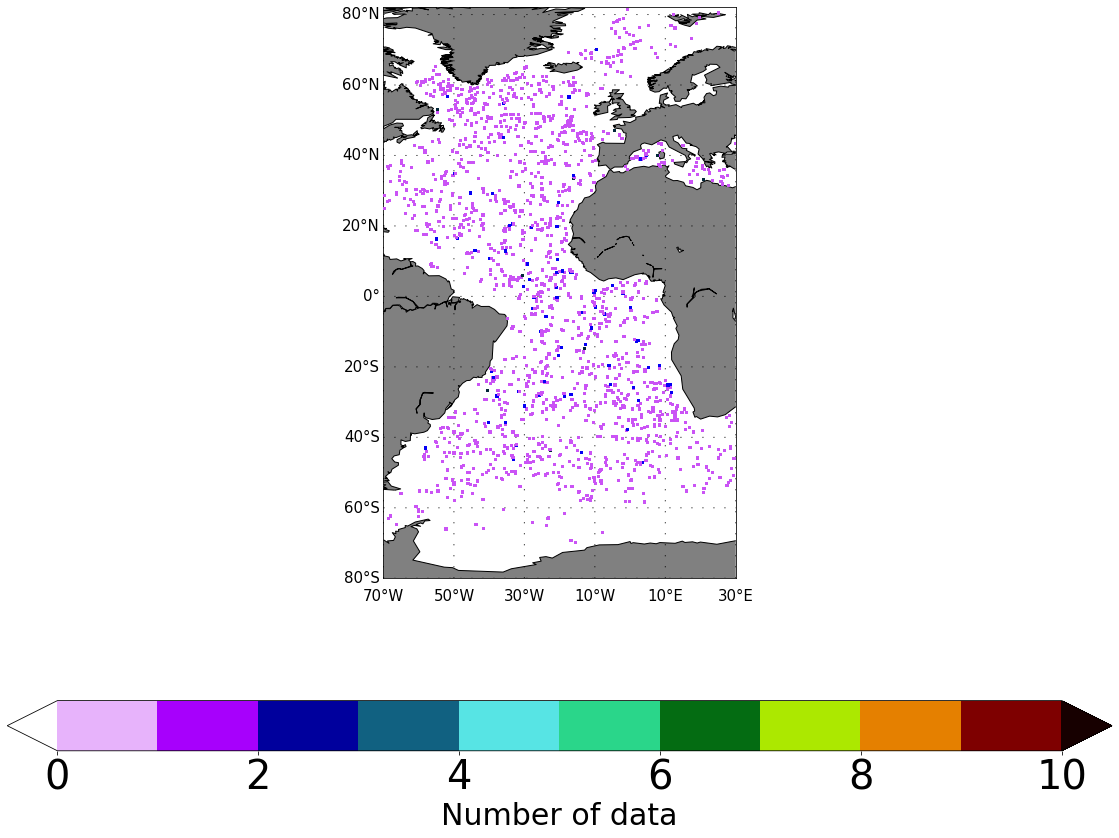

In [12]:
lat_test = np.arange(-89.5,90.5,1)
lon_test = np.arange(-179.5, 180.5,1)
lon2, lat2 = np.meshgrid(lon_test,lat_test)

plt.figure(figsize=[20. , 15.],facecolor='w')
limits=[0.,10.]
m = Basemap(projection='cyl',llcrnrlat=-80,urcrnrlat=90,\
llcrnrlon=-70,urcrnrlon=30)
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='white',zorder = 0)
parallels = np.arange(-80.,81,20.)
m.drawparallels(parallels,dashes=[1,10],labels=[1,0,0,0],fontsize=15) #[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,dashes=[1,10],labels=[True,False,False,True],fontsize=15)
norm = mpl.colors.Normalize(vmin=limits[0], vmax=limits[1])
pal = gen_pal_Testu()
contours = np.arange(0.,11.,1.)
C1 = m.contourf(lon2,lat2,np.ones((len(lat_test),len(lon_test)))*np.nan,contours,cmap=pal,norm=norm,extend='both')
cbar = plt.colorbar(C1,orientation='horizontal',shrink=0.99)
plt.clim(limits[0],limits[1])
cbar.set_label('Number of data',fontsize=30)
cbar.ax.tick_params(labelsize=40)
plt.scatter(lon_new_A25_Nov, lat_new_A25_Nov, marker='s', c=pCO2_number_A25_Nov, vmin=0., vmax=10., s=10, zorder=10,edgecolor='None',cmap=pal)
locs, labels = plt.xticks(size = 30)
locsY,labelsy = plt.yticks(size = 30)
plt.ylim(-80.,82.)
plt.savefig('/Users/annasommer/Documents/Documents/OSSE_Project/Figures/Figure_NovArgo25.png')